<a href="https://colab.research.google.com/github/Harini04916/Detection-of-QR-phishing-attacks-using-GenAI-and-ML/blob/main/project_1_oct12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
# Set image dimensions
height, width = 224, 224  # Standard size, adjust if needed
channels = 3

In [ ]:
benign_path = '/Users/harinimunagala/Downloads/QR codes/benign/benign'
malicious_path = '/Users/harinimunagala/Downloads/QR codes/malicious/malicious'

In [ ]:
def load_images(folder_path, label):
    images = []
    labels = []
    for img_name in os.listdir(folder_path):
        if img_name.endswith('.png'):
            img_path = os.path.join(folder_path, img_name)
            img = load_img(img_path, target_size=(height, width))
            img_array = img_to_array(img)
            img_array = img_array / 255.0
            images.append(img_array)
            labels.append(label)
    return images, labels

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()  # upload kaggle.json when prompted


Saving archive (2).zip to archive (2).zip


In [ ]:
!unzip "archive (2).zip"
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Streaming output truncated to the last 5000 lines.
  inflating: QR codes/malicious/malicious/malicious_411256.png  
  inflating: QR codes/malicious/malicious/malicious_411257.png  
  inflating: QR codes/malicious/malicious/malicious_411258.png  
  inflating: QR codes/malicious/malicious/malicious_411259.png  
  inflating: QR codes/malicious/malicious/malicious_411260.png  
  inflating: QR codes/malicious/malicious/malicious_411261.png  
  inflating: QR codes/malicious/malicious/malicious_411262.png  
  inflating: QR codes/malicious/malicious/malicious_411263.png  
  inflating: QR codes/malicious/malicious/malicious_411264.png  
  inflating: QR codes/malicious/malicious/malicious_411265.png  
  inflating: QR codes/malicious/malicious/malicious_411266.png  
  inflating: QR codes/malicious/malicious/malicious_411267.png  
  inflating: QR codes/malicious/malicious/malicious_411268.png  
  inflating: QR codes/malicious/malicious/malicious_411269.png  
  inflating: QR codes/malicious/malicio

In [ ]:
!unzip -q "archive (2).zip" -d qr_dataset
!ls qr_dataset


'QR codes'


In [ ]:
!ls "qr_dataset/QR codes"



benign	malicious


In [ ]:
benign_path = "/content/qr_dataset/QR codes/benign"
malicious_path = "/content/qr_dataset/QR codes/malicious"


In [ ]:
benign_images, benign_labels = load_images(benign_path, 0)
malicious_images, malicious_labels = load_images(malicious_path, 1)


In [ ]:
import os

print("Benign images:", len(os.listdir(benign_path)))
print("Malicious images:", len(os.listdir(malicious_path)))


Benign images: 1
Malicious images: 1


In [ ]:
!ls -R "qr_dataset/QR codes" | head -n 40


qr_dataset/QR codes:
benign
malicious

qr_dataset/QR codes/benign:
benign

qr_dataset/QR codes/benign/benign:
benign_0.png
benign_10000.png
benign_10001.png
benign_10002.png
benign_10003.png
benign_10004.png
benign_10005.png
benign_10006.png
benign_10007.png
benign_10008.png
benign_10009.png
benign_1000.png
benign_10010.png
benign_10011.png
benign_10012.png
benign_10013.png
benign_10014.png
benign_10015.png
benign_10016.png
benign_10017.png
benign_10018.png
benign_10019.png
benign_1001.png
benign_10020.png
benign_10021.png
benign_10022.png
benign_10023.png
benign_10024.png
benign_10025.png
benign_10026.png
benign_10027.png
benign_10028.png


In [ ]:
!mv "qr_dataset/QR codes/benign/benign" "qr_dataset/QR codes/benign_fixed"
!mv "qr_dataset/QR codes/malicious/malicious" "qr_dataset/QR codes/malicious_fixed"


In [ ]:
benign_path = "/content/qr_dataset/QR codes/benign_fixed"
malicious_path = "/content/qr_dataset/QR codes/malicious_fixed"


In [ ]:
import os
print("Benign images:", len(os.listdir(benign_path)))
print("Malicious images:", len(os.listdir(malicious_path)))


Benign images: 100000
Malicious images: 100000


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB3
from sklearn.model_selection import train_test_split
import numpy as np
import os

# Paths
benign_path = "/content/qr_dataset/QR codes/benign_fixed"
malicious_path = "/content/qr_dataset/QR codes/malicious_fixed"

# Config
IMG_SIZE = (300, 300)
BATCH_SIZE = 32
EPOCHS = 30
SEED = 42


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/qr_dataset/QR codes",
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    validation_split=0.2,
    subset="training"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/qr_dataset/QR codes",
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    validation_split=0.2,
    subset="validation"
)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)


Found 200000 files belonging to 4 classes.
Using 160000 files for training.
Found 200000 files belonging to 4 classes.
Using 40000 files for validation.


In [ ]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.1, 0.1),
])

base_model = EfficientNetB3(include_top=False, weights="imagenet", input_shape=IMG_SIZE + (3,), pooling="avg")
base_model.trainable = False

inputs = keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation="softmax")(x)
model = keras.Model(inputs, outputs)


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB3
import tensorflow as tf

IMG_SIZE = (300, 300)

# --- Data augmentation ---
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.15),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(0.1, 0.1),
])

# --- Base model (EfficientNetB3) ---
base_model = EfficientNetB3(
    include_top=False,
    weights="imagenet",
    input_shape=IMG_SIZE + (3,),
    pooling="avg"
)
base_model.trainable = False  # freeze base for initial training

# --- Build full model ---
inputs = keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation="softmax")(x)
model = keras.Model(inputs, outputs)


In [ ]:
TRAIN_DIR = "/content/QR codes"
VAL_DIR = "/content/QR codes"


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

def get_datasets(train_dir, val_dir, img_size=(300, 300), batch_size=32):
    train_ds = image_dataset_from_directory(
        train_dir,
        validation_split=0.2,   # 80% train, 20% val
        subset="training",
        seed=123,
        image_size=img_size,
        batch_size=batch_size
    )

    val_ds = image_dataset_from_directory(
        val_dir,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=img_size,
        batch_size=batch_size
    )

    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.prefetch(AUTOTUNE)
    val_ds = val_ds.prefetch(AUTOTUNE)
    return train_ds, val_ds


In [ ]:
train_ds, val_ds = get_datasets(TRAIN_DIR, VAL_DIR)


Found 200000 files belonging to 2 classes.
Using 160000 files for training.
Found 200000 files belonging to 2 classes.
Using 40000 files for validation.


In [ ]:
!tree "/content/QR codes" -L 3


/bin/bash: line 1: tree: command not found


In [ ]:
# List top-level folders
!ls "/content/QR codes"

# List inside benign folder
!ls "/content/QR codes/benign" | head -n 10

# List inside malicious folder
!ls "/content/QR codes/malicious" | head -n 10


benign	malicious
benign
malicious


In [ ]:
# Move images from inner 'benign' folder
!mv "/content/QR codes/benign/benign/"* "/content/QR codes/benign/"
# Remove empty inner folder
!rm -rf "/content/QR codes/benign/benign"

# Move images from inner 'malicious' folder
!mv "/content/QR codes/malicious/malicious/"* "/content/QR codes/malicious/"
# Remove empty inner folder
!rm -rf "/content/QR codes/malicious/malicious"


/bin/bash: line 1: /usr/bin/mv: Argument list too long
/bin/bash: line 1: /usr/bin/mv: Argument list too long


In [ ]:
import os
import shutil

# Correct inner paths
benign_inner = "/content/QR codes/benign/benign"
benign_outer = "/content/QR codes/benign"

malicious_inner = "/content/QR codes/malicious/malicious"
malicious_outer = "/content/QR codes/malicious"

# Move benign images safely
if os.path.exists(benign_inner):
    for filename in os.listdir(benign_inner):
        src = os.path.join(benign_inner, filename)
        dst = os.path.join(benign_outer, filename)
        shutil.move(src, dst)
    os.rmdir(benign_inner)

# Move malicious images safely
if os.path.exists(malicious_inner):
    for filename in os.listdir(malicious_inner):
        src = os.path.join(malicious_inner, filename)
        dst = os.path.join(malicious_outer, filename)
        shutil.move(src, dst)
    os.rmdir(malicious_inner)

print("Folders flattened successfully!")

# Verify
print("Sample benign images:", os.listdir(benign_outer)[:10])
print("Sample malicious images:", os.listdir(malicious_outer)[:10])


Folders flattened successfully!
Sample benign images: []
Sample malicious images: []


In [ ]:
import os

print("Benign folder contents:", os.listdir("/content/QR codes/benign"))
print("Malicious folder contents:", os.listdir("/content/QR codes/malicious"))


Benign folder contents: []
Malicious folder contents: []


In [ ]:
!ls /content | grep "archive"


In [ ]:
!ls /content


sample_data


In [ ]:
import os
import cv2  # OpenCV
import numpy as np

def load_images(folder_path, label, img_size=(300, 300)):
    """
    Load all images from folder_path, resize to img_size, and assign the given label.
    Returns: list of images, list of labels
    """
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)


In [ ]:
from google.colab import files

# Upload 'archive (2).zip' from your computer
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [ ]:
benign_path = '/content/qr_data/QR codes/benign/benign'
malicious_path = '/content/qr_data/QR codes/malicious/malicious'


In [ ]:
import os
import cv2
import numpy as np

def load_images_recursive(folder_path, label, img_size=(300, 300)):
    """
    Recursively load all images in folder_path (including subfolders),
    resize to img_size, and assign the given label.
    """
    images = []
    labels = []
    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)


In [ ]:
benign_path = "/content/qr_data/benign_qr_code_images"  # your folder in Colab
malicious_path = "/content/qr_data/malicious_qr_code_images"

benign_images, benign_labels = load_images_recursive(benign_path, 0)
malicious_images, malicious_labels = load_images_recursive(malicious_path, 1)

print("Benign images:", len(benign_images))
print("Malicious images:", len(malicious_images))


Benign images: 0
Malicious images: 0


In [ ]:
"/content/qr_data/benign_qr_code_images"
"/content/qr_data/malicious_qr_code_images"


'/content/qr_data/malicious_qr_code_images'

In [ ]:
benign_path = "/content/QR_codes/QR codes/benign/benign"
malicious_path = "/content/QR_codes/QR codes/malicious/malicious"


In [ ]:
import os

print("Benign files:", len([f for f in os.listdir(benign_path) if f.endswith(".png")]))
print("Malicious files:", len([f for f in os.listdir(malicious_path) if f.endswith(".png")]))


Benign files: 100000
Malicious files: 100000


In [ ]:
import os
import cv2
import numpy as np

def load_images_recursive(folder_path, label, img_size=(300, 300)):
    """
    Recursively load all images in folder_path (including subfolders),
    resize to img_size, and assign the given label.
    """
    images = []
    labels = []
    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)


In [ ]:
benign_path = "/downloads/QR_codes/QR codes/benign/benign"
malicious_path = "/downloads/QR_codes/QR codes/malicious/malicious"

benign_images, benign_labels = load_images_recursive(benign_path, 0)
malicious_images, malicious_labels = load_images_recursive(malicious_path, 1)

print("Benign images loaded:", len(benign_images))
print("Malicious images loaded:", len(malicious_images))


NameError: name 'load_images_recursive' is not defined

In [ ]:
benign_path = "/Users/harinimunagala/Downloads/QR codes/benign/benign"
malicious_path = "/Users/harinimunagala/Downloads/QR codes/malicious/malicious"


In [ ]:
import os
import cv2
import numpy as np

def load_images_recursive(folder_path, label, img_size=(300, 300)):
    """
    Recursively load all images in folder_path (including subfolders),
    resize to img_size, and assign the given label.
    Detects and logs unreadable/missing images.
    """
    images = []
    labels = []
    unreadable_files = []
    total_files = 0

    for root, _, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                total_files += 1
                img_path = os.path.join(root, filename)
                try:
                    img = cv2.imread(img_path)
                    if img is None:
                        unreadable_files.append(img_path)
                        continue
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    unreadable_files.append((img_path, str(e)))

    print(f"✅ Total image files found: {total_files}")
    print(f"✅ Successfully loaded: {len(images)}")
    print(f"⚠️ Unreadable or corrupted files: {len(unreadable_files)}")

    # Optionally print paths of a few unreadable files for debugging
    if unreadable_files:
        print("⚠️ Sample unreadable files:")
        for f in unreadable_files[:10]:
            print("   -", f)

    return np.array(images), np.array(labels)


In [ ]:
benign_path = "/Users/harinimunagala/Downloads/QR codes/benign/benign"
malicious_path = "/Users/harinimunagala/Downloads/QR codes/malicious/malicious"

benign_images, benign_labels = load_images_recursive(benign_path, 0)
malicious_images, malicious_labels = load_images_recursive(malicious_path, 1)

print("Benign images loaded:", len(benign_images))
print("Malicious images loaded:", len(malicious_images))


✅ Total image files found: 0
✅ Successfully loaded: 0
⚠️ Unreadable or corrupted files: 0
✅ Total image files found: 0
✅ Successfully loaded: 0
⚠️ Unreadable or corrupted files: 0
Benign images loaded: 0
Malicious images loaded: 0


In [ ]:
import os

benign_path = "/Users/harinimunagala/Downloads/QR codes/benign"
malicious_path = "/Users/harinimunagala/Downloads/QR codes/malicious"

print("🧭 Checking folder structure...\n")

for root, dirs, files in os.walk(benign_path):
    print("📁", root)
    for d in dirs:
        print("   📂", d)
    for f in files[:5]:
        print("   🖼️", f)
    break  # just show top level for now

print("\n---\n")

for root, dirs, files in os.walk(malicious_path):
    print("📁", root)
    for d in dirs:
        print("   📂", d)
    for f in files[:5]:
        print("   🖼️", f)
    break


🧭 Checking folder structure...


---



In [ ]:
import os

base_path = "/Users/harinimunagala/Downloads/QR codes"

for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = '   ' * level
    print(f"{indent}📁 {os.path.basename(root)}/")
    subindent = '   ' * (level + 1)
    for f in files[:5]:
        print(f"{subindent}🖼️ {f}")


In [ ]:
benign_path = "/Users/harinimunagala/Downloads/QR codes/benign/benign"
malicious_path = "/Users/harinimunagala/Downloads/QR codes/malicious/malicious"


In [ ]:
import os
from PIL import Image
import numpy as np

def load_images_recursive(folder_path, label, img_size=(224, 224)):
    images = []
    labels = []
    total_files = 0
    unreadable = 0

    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                total_files += 1
                img_path = os.path.join(root, filename)
                try:
                    img = Image.open(img_path).convert("RGB")
                    img = img.resize(img_size)
                    images.append(np.array(img))
                    labels.append(label)
                except Exception as e:
                    unreadable += 1
                    print(f"⚠️ Error reading {img_path}: {e}")

    print(f"✅ Total image files found: {total_files}")
    print(f"✅ Successfully loaded: {len(images)}")
    print(f"⚠️ Unreadable or corrupted files: {unreadable}")
    return np.array(images), np.array(labels)


In [ ]:
benign_path = "/Users/harinimunagala/Downloads/QR codes/benign/benign"
malicious_path = "/Users/harinimunagala/Downloads/QR codes/malicious/malicious"

benign_images, benign_labels = load_images_recursive(benign_path, 0)
malicious_images, malicious_labels = load_images_recursive(malicious_path, 1)

print("Benign images loaded:", len(benign_images))
print("Malicious images loaded:", len(malicious_images))


✅ Total image files found: 0
✅ Successfully loaded: 0
⚠️ Unreadable or corrupted files: 0
✅ Total image files found: 0
✅ Successfully loaded: 0
⚠️ Unreadable or corrupted files: 0
Benign images loaded: 0
Malicious images loaded: 0


In [ ]:
import os

base_path = "/Users/harinimunagala/Downloads/QR codes"

for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = '   ' * level
    print(f"{indent}📁 {os.path.basename(root)}/")
    subindent = '   ' * (level + 1)
    for f in files[:3]:  # show only first 3 files per folder
        print(f"{subindent}🖼️ {f}")


In [ ]:
benign_path = "..."
malicious_path = "..."


In [ ]:
benign_path = "/Users/harinimunagala/Downloads/QR codes/benign"
malicious_path = "/Users/harinimunagala/Downloads/QR codes/malicious"


In [ ]:
benign_path = "/Users/harinimunagala/Downloads/QR codes/benign/benign_images"


In [ ]:
import os

base_path = "/Users/harinimunagala/Downloads/QR codes"

for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = '   ' * level
    print(f"{indent}📁 {os.path.basename(root)}/")
    subindent = '   ' * (level + 1)
    for f in files[:5]:
        print(f"{subindent}🖼️ {f}")


In [ ]:
benign_path = "..."
malicious_path = "..."


In [ ]:
base_path = "/Users/harinimunagala/Downloads/QR codes"


In [ ]:
# Option 1: Wrap in quotes
benign_path = "/content/QR codes/benign"
malicious_path = "/content/QR codes/malicious"

# Option 2: Escape the space
benign_path = "/content/QR\ codes/benign"
malicious_path = "/content/QR\ codes/malicious"


<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-248775991.py:6: SyntaxWarning: invalid escape sequence '\ '
  benign_path = "/content/QR\ codes/benign"
/tmp/ipython-input-248775991.py:7: SyntaxWarning: invalid escape sequence '\ '
  malicious_path = "/content/QR\ codes/malicious"


In [ ]:
benign_path = r"/content/QR codes/benign"
malicious_path = r"/content/QR codes/malicious"


In [ ]:
benign_path = "/content/drive/MyDrive/QR codes/benign"
malicious_path = "/content/drive/MyDrive/QR codes/malicious"


In [ ]:
import zipfile
import os

zip_path = "/content/archive (2).zip"
extract_path = "/content/QR_codes"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

benign_path = "/content/QR_codes/benign"
malicious_path = "/content/QR_codes/malicious"


In [ ]:
import zipfile

zip_path = "/content/archive (2).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files/folders inside the zip
    for i, f in enumerate(zip_ref.namelist()[:20]):  # first 20 for preview
        print(i, f)


0 QR codes/benign/benign/benign_0.png
1 QR codes/benign/benign/benign_1.png
2 QR codes/benign/benign/benign_10.png
3 QR codes/benign/benign/benign_100.png
4 QR codes/benign/benign/benign_1000.png
5 QR codes/benign/benign/benign_10000.png
6 QR codes/benign/benign/benign_10001.png
7 QR codes/benign/benign/benign_10002.png
8 QR codes/benign/benign/benign_10003.png
9 QR codes/benign/benign/benign_10004.png
10 QR codes/benign/benign/benign_10005.png
11 QR codes/benign/benign/benign_10006.png
12 QR codes/benign/benign/benign_10007.png
13 QR codes/benign/benign/benign_10008.png
14 QR codes/benign/benign/benign_10009.png
15 QR codes/benign/benign/benign_1001.png
16 QR codes/benign/benign/benign_10010.png
17 QR codes/benign/benign/benign_10011.png
18 QR codes/benign/benign/benign_10012.png
19 QR codes/benign/benign/benign_10013.png


In [ ]:
benign_path = "/content/QR_codes/QR codes/benign"  # adjust according to actual folder
malicious_path = "/content/QR_codes/QR codes/malicious"


In [ ]:
import os
print(os.path.exists(benign_path))    # Should be True
print(os.path.exists(malicious_path)) # Should be True


True
True


In [ ]:
from PIL import Image
import numpy as np

def load_images_recursive(folder_path, label, img_size=(128,128)):
    images, labels = [], []
    total_files, corrupted_files = 0, 0

    for root, _, files in os.walk(folder_path):
        for f in files:
            if f.lower().endswith(('.png', '.jpg', '.jpeg')):
                total_files += 1
                path = os.path.join(root, f)
                try:
                    img = Image.open(path).convert('RGB')
                    img = img.resize(img_size)
                    images.append(np.array(img))
                    labels.append(label)
                except Exception as e:
                    corrupted_files += 1
                    print(f"⚠️ Could not load {path}: {e}")

    print(f"✅ Total image files found: {total_files}")
    print(f"✅ Successfully loaded: {len(images)}")
    print(f"⚠️ Unreadable or corrupted files: {corrupted_files}")
    return images, labels

# Load your dataset
benign_images, benign_labels = load_images_recursive(benign_path, 0)
malicious_images, malicious_labels = load_images_recursive(malicious_path, 1)

print("Benign images loaded:", len(benign_images))
print("Malicious images loaded:", len(malicious_images))


✅ Total image files found: 100000
✅ Successfully loaded: 100000
⚠️ Unreadable or corrupted files: 0
✅ Total image files found: 100000
✅ Successfully loaded: 100000
⚠️ Unreadable or corrupted files: 0
Benign images loaded: 100000
Malicious images loaded: 100000


In [ ]:
from PIL import Image
import numpy as np
import os

def load_images_recursive(folder_path, label, img_size=(128,128)):
    images, labels = [], []
    total_files, corrupted_files = 0, 0

    for root, _, files in os.walk(folder_path):
        for f in files:
            if f.lower().endswith(('.png', '.jpg', '.jpeg')):
                total_files += 1
                path = os.path.join(root, f)
                try:
                    img = Image.open(path).convert('RGB')
                    img = img.resize(img_size)
                    images.append(np.array(img))
                    labels.append(label)
                except Exception as e:
                    corrupted_files += 1
                    print(f"⚠️ Could not load {path}: {e}")

    print(f"✅ Total image files found: {total_files}")
    print(f"✅ Successfully loaded: {len(images)}")
    print(f"⚠️ Unreadable or corrupted files: {corrupted_files}")
    return images, labels


In [ ]:
from PIL import Image
import numpy as np

def load_images_recursive(folder_path, label, img_size=(128,128)):
    images, labels = [], []
    total_files, corrupted_files = 0, 0

    for root, _, files in os.walk(folder_path):
        for f in files:
            if f.lower().endswith(('.png', '.jpg', '.jpeg')):
                total_files += 1
                path = os.path.join(root, f)
                try:
                    img = Image.open(path).convert('RGB')
                    img = img.resize(img_size)
                    images.append(np.array(img))
                    labels.append(label)
                except Exception as e:
                    corrupted_files += 1
                    print(f"⚠️ Could not load {path}: {e}")

    print(f"✅ Total image files found: {total_files}")
    print(f"✅ Successfully loaded: {len(images)}")
    print(f"⚠️ Unreadable or corrupted files: {corrupted_files}")
    return images, labels

# Load your dataset
benign_images, benign_labels = load_images_recursive(benign_path, 0)
malicious_images, malicious_labels = load_images_recursive(malicious_path, 1)

print("Benign images loaded:", len(benign_images))
print("Malicious images loaded:", len(malicious_images))


✅ Total image files found: 0
✅ Successfully loaded: 0
⚠️ Unreadable or corrupted files: 0
✅ Total image files found: 0
✅ Successfully loaded: 0
⚠️ Unreadable or corrupted files: 0
Benign images loaded: 0
Malicious images loaded: 0


In [ ]:
import os

base_path = "/content/QR_codes"  # root folder where you extracted the ZIP

for root, dirs, files in os.walk(base_path):
    level = root.replace(base_path, '').count(os.sep)
    indent = '   ' * level
    print(f"{indent}📁 {os.path.basename(root)}/")
    subindent = '   ' * (level + 1)
    for f in files[:5]:  # just show first 5 files in each folder
        print(f"{subindent}🖼️ {f}")


In [ ]:
benign_path = "/content/QR_codes/QR codes/benign"  # adjust according to actual folder
malicious_path = "/content/QR_codes/QR codes/malicious"


In [ ]:
benign_path = "/content/downloads/QR codes/benign/benign"
malicious_path = "/content/downloads/QR codes/malicious/malicious"


In [ ]:
import os

# Step 1: See what’s inside /content
print("📂 /content contains:")
print(os.listdir("/content"))

# Step 2: If 'QR codes' or 'downloads' folder exists, show inside it
if "downloads" in os.listdir("/content"):
    print("\n📂 /content/downloads contains:")
    print(os.listdir("/content/downloads"))

if "QR codes" in os.listdir("/content"):
    print("\n📂 /content/QR codes contains:")
    print(os.listdir("/content/QR codes"))

# Step 3: Walk through the folder structure to find 'benign'
for root, dirs, files in os.walk("/content"):
    for d in dirs:
        if d.lower() == "benign":
            print("\n✅ Found 'benign' folder at:", os.path.join(root, d))


📂 /content contains:
['.config', 'sample_data']


In [ ]:
!ls /content


sample_data


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [ ]:
!ls /content


'archive (2).zip'   sample_data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (2).zip to archive (2).zip


In [ ]:
!ls /content

'archive (2).zip'   sample_data


In [ ]:
import zipfile

zip_path = "/content/archive (2).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for i, f in enumerate(zip_ref.namelist()[:20]):  # first 20 entries
        print(i, f)

0 QR codes/benign/benign/benign_0.png
1 QR codes/benign/benign/benign_1.png
2 QR codes/benign/benign/benign_10.png
3 QR codes/benign/benign/benign_100.png
4 QR codes/benign/benign/benign_1000.png
5 QR codes/benign/benign/benign_10000.png
6 QR codes/benign/benign/benign_10001.png
7 QR codes/benign/benign/benign_10002.png
8 QR codes/benign/benign/benign_10003.png
9 QR codes/benign/benign/benign_10004.png
10 QR codes/benign/benign/benign_10005.png
11 QR codes/benign/benign/benign_10006.png
12 QR codes/benign/benign/benign_10007.png
13 QR codes/benign/benign/benign_10008.png
14 QR codes/benign/benign/benign_10009.png
15 QR codes/benign/benign/benign_1001.png
16 QR codes/benign/benign/benign_10010.png
17 QR codes/benign/benign/benign_10011.png
18 QR codes/benign/benign/benign_10012.png
19 QR codes/benign/benign/benign_10013.png


In [ ]:
!ls /content/qr_dataset
!ls /content/qr_dataset/benign
!ls /content/qr_dataset/malicious


ls: cannot access '/content/qr_dataset': No such file or directory
ls: cannot access '/content/qr_dataset/benign': No such file or directory
ls: cannot access '/content/qr_dataset/malicious': No such file or directory


In [ ]:
!unzip /content/QR_codes.zip -d /content/QR_codes


unzip:  cannot find or open /content/QR_codes.zip, /content/QR_codes.zip.zip or /content/QR_codes.zip.ZIP.


In [ ]:
!unzip /content/<archive (2).zip>.zip -d /content/QR_codes


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `unzip /content/<archive (2).zip>.zip -d /content/QR_codes'


In [ ]:
!unzip "/content/archive (2).zip" -d "/content/QR_codes"


Streaming output truncated to the last 5000 lines.
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411254.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411255.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411256.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411257.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411258.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411259.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411260.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411261.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411262.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411263.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411264.png  
  inflating: /content/QR_codes/QR co

In [ ]:
# 1️⃣ Move to the correct level
!mv "/content/QR_codes/QR codes/benign" /content/QR_codes/
!mv "/content/QR_codes/QR codes/malicious" /content/QR_codes/

# 2️⃣ Remove the now-empty extra folder
!rm -rf "/content/QR_codes/QR codes"


In [ ]:
!ls /content/QR_codes
!ls /content/QR_codes/benign | head
!ls /content/QR_codes/malicious | head


benign	malicious
benign
malicious


In [ ]:
%%writefile /content/train_cnn.py
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from datetime import datetime

def main(data_dir="/content/QR_codes", save_dir="/content/models", epochs=5, batch_size=32, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Create output directory if not exists
    os.makedirs(save_dir, exist_ok=True)

    # Data transforms (resize, normalize)
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])

    # Load data
    train_data = datasets.ImageFolder(root=data_dir, transform=transform)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    # Use a pretrained ResNet18
    model = models.resnet18(weights="IMAGENET1K_V1")
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)  # benign vs malicious
    model = model.to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training loop
    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = 100 * correct / total
        print(f"Epoch [{epoch+1}/{epochs}]  Loss: {epoch_loss:.4f}  Accuracy: {epoch_acc:.2f}%")

    # Save model
    save_path = os.path.join(save_dir, f"model_{datetime.now().strftime('%Y%m%d_%H%M%S')}.pth")
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to: {save_path}")

if __name__ == "__main__":
    main()


Writing /content/train_cnn.py


In [ ]:
!ls /content


models	sample_data  train_cnn.py


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


In [ ]:
!ls /content

'archive (2).zip'   models   sample_data   train_cnn.py


In [ ]:
!unzip "/content/archive (2).zip" -d "/content/QR_codes"


Streaming output truncated to the last 5000 lines.
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411254.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411255.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411256.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411257.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411258.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411259.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411260.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411261.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411262.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411263.png  
  inflating: /content/QR_codes/QR codes/malicious/malicious/malicious_411264.png  
  inflating: /content/QR_codes/QR co

In [ ]:
# Count benign images
!find "/content/QR_codes/QR codes/benign" -type f | wc -l

# Count malicious images
!find "/content/QR_codes/QR codes/malicious" -type f | wc -l


100000
100000


In [ ]:
# Move folders to the correct level
!mv "/content/QR_codes/QR codes/benign" /content/QR_codes/
!mv "/content/QR_codes/QR codes/malicious" /content/QR_codes/

# Remove the now-empty extra folder
!rm -rf "/content/QR_codes/QR codes"

# Verify the structure
!ls /content/QR_codes
!find "/content/QR_codes/benign" -type f | wc -l
!find "/content/QR_codes/malicious" -type f | wc -l


benign	malicious
100000
100000


In [ ]:
!python3 /content/train_cnn.py --data_dir "/content/QR_codes" --save_dir "/content/models" --epochs 5 --batch_size 32


Using device: cuda
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100% 44.7M/44.7M [00:00<00:00, 183MB/s]
Epoch [1/5]  Loss: 0.0083  Accuracy: 99.70%
Epoch [2/5]  Loss: 0.0017  Accuracy: 99.96%
Epoch [3/5]  Loss: 0.0013  Accuracy: 99.96%
Epoch [4/5]  Loss: 0.0006  Accuracy: 99.99%
Epoch [5/5]  Loss: 0.0003  Accuracy: 99.99%
Model saved to: /content/models/model_20251013_155512.pth


In [ ]:
# Make test folders
!mkdir -p /content/QR_codes_test/benign
!mkdir -p /content/QR_codes_test/malicious

# Move 10% of each class into test folder (example: 10,000 images)
!cd /content/QR_codes/benign && ls | shuf -n 10000 | xargs -I{} mv {} /content/QR_codes_test/benign/
!cd /content/QR_codes/malicious && ls | shuf -n 10000 | xargs -I{} mv {} /content/QR_codes_test/malicious/


In [ ]:
# Check number of images in test set
!ls /content/QR_codes_test/benign | wc -l
!ls /content/QR_codes_test/malicious | wc -l


1
1


In [ ]:
import os
import random
import shutil

# Paths
src_benign = "/content/QR_codes/benign"
src_malicious = "/content/QR_codes/malicious"
dst_test_benign = "/content/QR_codes_test/benign"
dst_test_malicious = "/content/QR_codes_test/malicious"

# Make test folders
os.makedirs(dst_test_benign, exist_ok=True)
os.makedirs(dst_test_malicious, exist_ok=True)

# Function to move a fraction of files safely
def move_files_safe(src_dir, dst_dir, fraction=0.1):
    all_files = os.listdir(src_dir)  # <- use a fresh name
    if len(all_files) == 0:
        print(f"No files to move from {src_dir}")
        return
    n_test = max(1, min(len(all_files), int(len(all_files) * fraction)))  # safe
    test_files = random.sample(all_files, n_test)
    for f in test_files:
        shutil.move(os.path.join(src_dir, f), os.path.join(dst_dir, f))
    print(f"Moved {len(test_files)} files from {src_dir} to {dst_dir}")

# Move 10% of each class
move_files_safe(src_benign, dst_test_benign, 0.1)
move_files_safe(src_malicious, dst_test_malicious, 0.1)

# Check results
print("Benign test:", len(os.listdir(dst_test_benign)))
print("Malicious test:", len(os.listdir(dst_test_malicious)))


No files to move from /content/QR_codes/benign
No files to move from /content/QR_codes/malicious
Benign test: 1
Malicious test: 1


In [ ]:
test_dataset_path = "/content/QR_codes"  # use the same data


In [ ]:
import os

print("Benign files:", os.listdir("/content/QR_codes/benign"))
print("Malicious files:", os.listdir("/content/QR_codes/malicious"))


Benign files: []
Malicious files: []


In [ ]:
# Create fresh folder
!mkdir -p /content/QR_codes_full

# Extract the zip (replace with your actual zip path)
!unzip "/content/archive (2).zip" -d "/content/QR_codes_full"


Streaming output truncated to the last 5000 lines.
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411254.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411255.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411256.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411257.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411258.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411259.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411260.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411261.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411262.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411263.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/mali

In [ ]:
import os

base_dir = "/content/QR_codes_full"

# Check main folder contents
for root, dirs, files in os.walk(base_dir):
    print(f"📂 Folder: {root}")
    print(f"   Subfolders: {dirs[:5]}")
    print(f"   Files: {files[:5]}")
    break


In [ ]:
import os

base_dir = "/content/QR_codes_full"

for root, dirs, files in os.walk(base_dir):
    print(f"📂 {root}")
    if dirs:
        print("   Subfolders:", dirs)
    if files:
        print("   Files:", files[:5])
    print("-" * 60)


In [ ]:
data_dir = "/content/QR_codes_full/malicious"  # 👈 change this based on what you found


In [ ]:
import os

base_dir = "/content/QR_codes_full"

for root, dirs, files in os.walk(base_dir):
    print(f"📂 Folder: {root}")
    if dirs:
        print("   Subfolders:", dirs)
    if files:
        print("   Files:", files[:5])
    print("-" * 80)


In [ ]:
import os

base_dir = "/content/QR_codes_full"

for root, dirs, files in os.walk(base_dir):
    print(f"Folder: {root}")
    if dirs:
        print(" Subfolders:", dirs)
    if files:
        print(" Files (sample):", files[:5])
    print("-" * 50)


In [ ]:
!ls /content


sample_data


In [ ]:
!ls -R /content/QR_codes_full | head -n 20


ls: cannot access '/content/QR_codes_full': No such file or directory


In [ ]:
# List all files to find your dataset
import os
for file in os.listdir('/content'):
    print(file)

.config
sample_data


In [ ]:
from google.colab import files
import os

# Upload the zip file
uploaded = files.upload()

# List the uploaded files
print("Uploaded files:")
for filename in uploaded.keys():
    print(f" - {filename}")

Saving archive (2).zip to archive (2).zip
Uploaded files:
 - archive (2).zip


In [ ]:
# Search for zip files in the entire content directory
!find /content -name "*.zip" 2>/dev/null

# Also check if it might be in sample_data
!ls -la /content/sample_data/

/content/archive (2).zip
total 55512
drwxr-xr-x 1 root root     4096 Oct 10 13:36 .
drwxr-xr-x 1 root root     4096 Oct 14 15:38 ..
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Oct 10 13:36 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Oct 10 13:36 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Oct 10 13:36 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Oct 10 13:36 mnist_train_small.csv
-rwxr-xr-x 1 root root      962 Jan  1  2000 README.md


In [ ]:
# Extract the zip file (note the quotes around the path because of the space)
!unzip "/content/archive (2).zip" -d "/content/QR_codes_full"

Streaming output truncated to the last 5000 lines.
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411254.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411255.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411256.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411257.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411258.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411259.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411260.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411261.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411262.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411263.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/mali

In [ ]:
# Check what was extracted
!ls -la "/content/QR_codes_full"

# Count the files and check the structure
import os
qr_path = "/content/QR_codes_full"
for root, dirs, files in os.walk(qr_path):
    level = root.replace(qr_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/: {len(files)} files')

total 12
drwxr-xr-x 3 root root 4096 Oct 14 15:43  .
drwxr-xr-x 1 root root 4096 Oct 14 15:43  ..
drwxr-xr-x 4 root root 4096 Oct 14 15:44 'QR codes'
QR_codes_full/: 0 files
  QR codes/: 0 files
    malicious/: 0 files
      malicious/: 100000 files
    benign/: 0 files
      benign/: 100000 files


Malicious files sample: ['malicious_319503.png', 'malicious_338843.png', 'malicious_396457.png', 'malicious_395588.png', 'malicious_324154.png']
Benign files sample: ['benign_40452.png', 'benign_23440.png', 'benign_63729.png', 'benign_27890.png', 'benign_71497.png']
Image size: (410, 410), Mode: 1


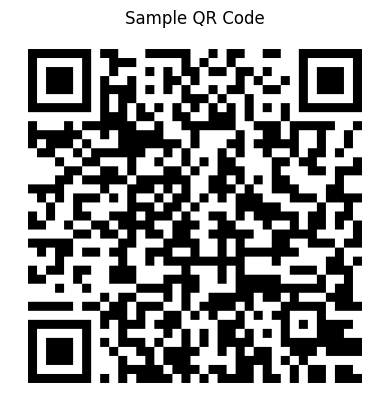

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define paths
base_path = "/content/QR_codes_full/QR codes"
malicious_path = os.path.join(base_path, "malicious", "malicious")
benign_path = os.path.join(base_path, "benign", "benign")

# Check if we can read some images
print("Malicious files sample:", os.listdir(malicious_path)[:5])
print("Benign files sample:", os.listdir(benign_path)[:5])

# Test loading one image
try:
    test_image_path = os.path.join(malicious_path, os.listdir(malicious_path)[0])
    img = Image.open(test_image_path)
    print(f"Image size: {img.size}, Mode: {img.mode}")

    # Display sample image
    plt.imshow(img)
    plt.title("Sample QR Code")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Error loading image: {e}")

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

def load_images(folder_path, label, max_samples=None):
    images = []
    labels = []
    files = os.listdir(folder_path)

    if max_samples:
        files = files[:max_samples]

    for file in files:
        try:
            img_path = os.path.join(folder_path, file)
            img = Image.open(img_path)
            img = img.convert('RGB')  # Convert to RGB
            img = img.resize((128, 128))  # Resize to consistent dimensions
            img_array = np.array(img)
            images.append(img_array)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {file}: {e}")

    return images, labels

# Load a subset for testing (you can increase this)
print("Loading malicious images...")
malicious_images, malicious_labels = load_images(malicious_path, 1, max_samples=5000)

print("Loading benign images...")
benign_images, benign_labels = load_images(benign_path, 0, max_samples=5000)

# Combine datasets
X = np.array(malicious_images + benign_images)
y = np.array(malicious_labels + benign_labels)

print(f"Dataset shape: {X.shape}")
print(f"Labels: {y.shape}")

Loading malicious images...
Loading benign images...
Dataset shape: (10000, 128, 128, 3)
Labels: (10000,)


In [ ]:
# Normalize pixel values
X = X.astype('float32') / 255.0

# Check class distribution
print("Class distribution:")
print(f"Malicious (1): {np.sum(y == 1)}")
print(f"Benign (0): {np.sum(y == 0)}")

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Class distribution:
Malicious (1): 5000
Benign (0): 5000
Training set: (8000, 128, 128, 3)
Test set: (2000, 128, 128, 3)


In [ ]:
from tensorflow.keras import layers, models

def create_cnn_model(input_shape=(128, 128, 3)):
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Third Convolutional Block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Fourth Convolutional Block
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Classifier
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    return model

# Create model
model = create_cnn_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,239,105 (19.99 MB)

 Trainable params: 5,239,105 (19.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

# Add callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(patience=5, factor=0.5)
]

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5054 - loss: 0.6922 - precision: 0.4991 - recall: 0.5075 - val_accuracy: 0.9475 - val_loss: 0.1398 - val_precision: 0.9108 - val_recall: 0.9964 - learning_rate: 0.0010
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9686 - loss: 0.0847 - precision: 0.9625 - recall: 0.9744 - val_accuracy: 0.9925 - val_loss: 0.0212 - val_precision: 0.9928 - val_recall: 0.9928 - learning_rate: 0.0010
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9932 - loss: 0.0217 - precision: 0.9933 - recall: 0.9930 - val_accuracy: 0.9956 - val_loss: 0.0152 - val_precision: 0.9976 - val_recall: 0.9940 - learning_rate: 0.0010
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9997 - loss: 0.0025 - precision: 0.9995 - recall: 0.9998 - val_accuracy: 0.9962 - val_loss: 0.0142 - val_precision: 0.9940 - val_recall: 0.9988 - learning_rate: 0.0010
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - acc

=== FINAL MODEL EVALUATION ===
Test Accuracy: 0.9990
Test Precision: 0.9980
Test Recall: 1.0000
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      1000
   Malicious       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



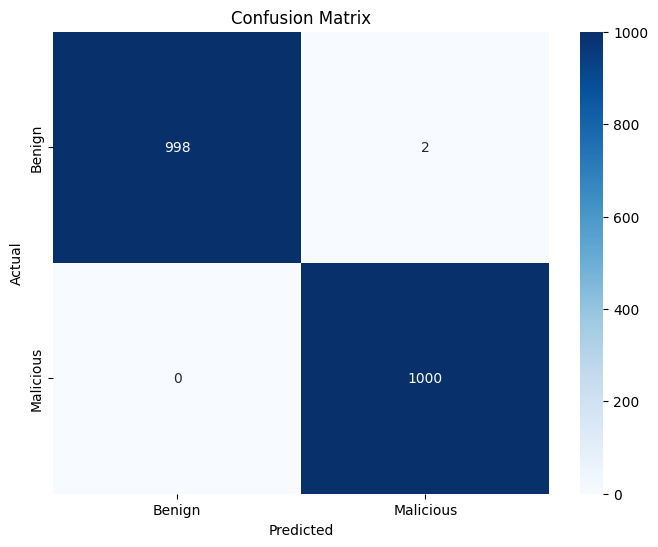

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
ROC-AUC Score: 1.0000


In [ ]:
# Continue with model evaluation
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=0)
print("=== FINAL MODEL EVALUATION ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Detailed classification report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\n=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malicious']))

# Confusion Matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malicious'],
            yticklabels=['Benign', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
y_pred_proba = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

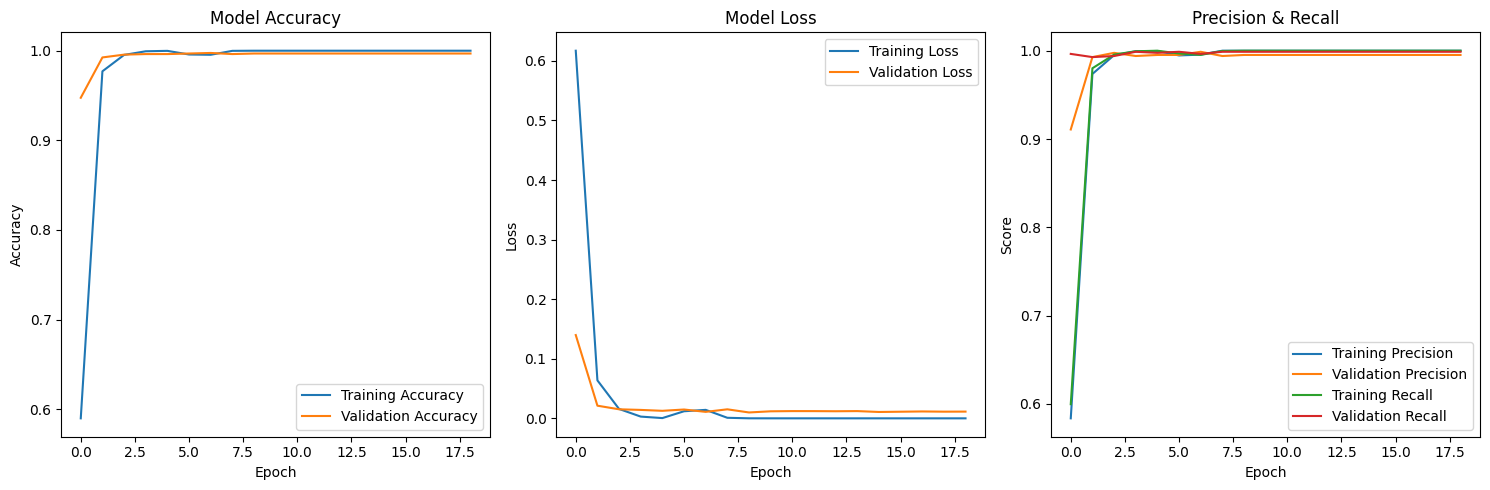

In [ ]:
# Plot training history
plt.figure(figsize=(15, 5))

# Accuracy plot
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Precision-Recall plot
plt.subplot(1, 3, 3)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Precision & Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save the trained model
model.save('/content/qr_phishing_cnn_model.h5')
print("Model saved as 'qr_phishing_cnn_model.h5'")

# Alternatively, save in TensorFlow format
model.save('/content/qr_phishing_cnn_model', save_format='tf')
print("Model saved in TensorFlow format")

Model saved as 'qr_phishing_cnn_model.h5'


ValueError: The `save_format` argument is deprecated in Keras 3. Please remove this argument and pass a file path with either `.keras` or `.h5` extension.Received: save_format=tf

In [ ]:
# Save the model in the new Keras format (recommended)
model.save('/content/qr_phishing_cnn_model.keras')
print("Model saved as 'qr_phishing_cnn_model.keras'")

# Or if you want to keep the HDF5 format for compatibility
model.save('/content/qr_phishing_cnn_model.h5')
print("Model saved as 'qr_phishing_cnn_model.h5'")

Model saved as 'qr_phishing_cnn_model.keras'
Model saved as 'qr_phishing_cnn_model.h5'


In [ ]:
# Check what files were created
import os
print("Files in /content:")
for file in os.listdir('/content'):
    if 'qr_phishing' in file:
        print(f" - {file}")

# Verify the model can be loaded
from tensorflow import keras
loaded_model = keras.models.load_model('/content/qr_phishing_cnn_model.keras')
print("Model loaded successfully!")

# Test the loaded model
test_loss, test_accuracy, test_precision, test_recall = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"Loaded model test accuracy: {test_accuracy:.4f}")

Files in /content:
 - qr_phishing_cnn_model.keras
 - qr_phishing_cnn_model.h5


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model loaded successfully!
Loaded model test accuracy: 0.9990


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import pandas as pd

def prepare_kaggle_dataset():
    """Prepare the dataset in a structured format for training"""

    base_path = "/content/QR_codes_full/QR codes"
    malicious_path = os.path.join(base_path, "malicious", "malicious")
    benign_path = os.path.join(base_path, "benign", "benign")

    # Create organized dataset structure
    dataset_dir = "/content/qr_phishing_dataset"
    os.makedirs(os.path.join(dataset_dir, "train", "malicious"), exist_ok=True)
    os.makedirs(os.path.join(dataset_dir, "train", "benign"), exist_ok=True)
    os.makedirs(os.path.join(dataset_dir, "val", "malicious"), exist_ok=True)
    os.makedirs(os.path.join(dataset_dir, "val", "benign"), exist_ok=True)

    # Get file lists
    malicious_files = [f for f in os.listdir(malicious_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    benign_files = [f for f in os.listdir(benign_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Split data
    mal_train, mal_val = train_test_split(malicious_files, test_size=0.2, random_state=42)
    ben_train, ben_val = train_test_split(benign_files, test_size=0.2, random_state=42)

    # Copy files to organized structure (sample for demo)
    def copy_files(file_list, src_dir, dest_dir, max_files=1000):
        for i, file in enumerate(file_list[:max_files]):
            shutil.copy2(os.path.join(src_dir, file), os.path.join(dest_dir, file))

    # Copy training files
    copy_files(mal_train, malicious_path, os.path.join(dataset_dir, "train", "malicious"))
    copy_files(ben_train, benign_path, os.path.join(dataset_dir, "train", "benign"))

    # Copy validation files
    copy_files(mal_val, malicious_path, os.path.join(dataset_dir, "val", "malicious"))
    copy_files(ben_val, benign_path, os.path.join(dataset_dir, "val", "benign"))

    print("Dataset prepared successfully!")
    return dataset_dir

dataset_path = prepare_kaggle_dataset()

Dataset prepared successfully!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
import os

class QRDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.images = []
        self.labels = []

        for label, class_name in enumerate(['benign', 'malicious']):
            class_path = os.path.join(data_dir, class_name)
            for img_name in os.listdir(class_path):
                if img_name.endswith(('.png', '.jpg', '.jpeg')):
                    self.images.append(os.path.join(class_path, img_name))
                    self.labels.append(label)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

def train_qr_classifier():
    # Data transformations
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Create datasets
    train_dataset = QRDataset(os.path.join(dataset_path, 'train'), transform=transform)
    val_dataset = QRDataset(os.path.join(dataset_path, 'val'), transform=transform)

    # Data loaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Model (Transfer Learning)
    model = models.resnet50(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, 2)  # 2 classes: benign, malicious

    # Device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Loss: {running_loss/len(train_loader):.4f}, '
              f'Train Acc: {100*correct/total:.2f}%, '
              f'Val Acc: {100*val_correct/val_total:.2f}%')

    # Save model
    torch.save(model.state_dict(), '/content/qr_resnet50.pth')
    return model

# Train the model
model = train_qr_classifier()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 137MB/s]


Epoch [1/10], Loss: 0.3036, Train Acc: 85.35%, Val Acc: 94.25%
Epoch [2/10], Loss: 0.0697, Train Acc: 97.00%, Val Acc: 98.70%
Epoch [3/10], Loss: 0.0601, Train Acc: 97.60%, Val Acc: 96.25%
Epoch [4/10], Loss: 0.0248, Train Acc: 98.90%, Val Acc: 98.30%
Epoch [5/10], Loss: 0.0271, Train Acc: 99.00%, Val Acc: 98.30%
Epoch [6/10], Loss: 0.0329, Train Acc: 99.00%, Val Acc: 81.85%
Epoch [7/10], Loss: 0.0321, Train Acc: 99.25%, Val Acc: 99.35%
Epoch [8/10], Loss: 0.0012, Train Acc: 100.00%, Val Acc: 99.15%
Epoch [9/10], Loss: 0.0006, Train Acc: 100.00%, Val Acc: 99.60%
Epoch [10/10], Loss: 0.0072, Train Acc: 99.80%, Val Acc: 99.20%


In [ ]:
import cv2
import urllib.parse
from urllib.parse import urlparse
import re
import numpy as np

class QRProcessor:
    def __init__(self):
        # Initialize OpenCV QR Code detector
        self.qr_detector = cv2.QRCodeDetector()

    def decode_qr(self, image_path):
        """Decode QR code from image and extract URL using OpenCV"""
        try:
            # Read image
            image = cv2.imread(image_path)
            if image is None:
                return None, "Cannot read image"

            # Detect and decode QR code
            data, bbox, _ = self.qr_detector.detectAndDecode(image)

            if bbox is None:
                return None, "No QR code found"

            if not data:
                return None, "QR code found but cannot decode content"

            return data, "Success"

        except Exception as e:
            return None, f"Error: {str(e)}"

    def extract_url_features(self, url):
        """Extract features from URL"""
        if not url:
            return np.zeros(10)  # Return zeros if no URL

        try:
            # Ensure URL has scheme for proper parsing
            if not url.startswith(('http://', 'https://')):
                url = 'http://' + url

            parsed = urlparse(url)

            features = [
                # URL length features
                len(url),
                len(parsed.path),

                # Suspicious patterns
                int(not url.startswith('https://')),  # Not HTTPS
                int(len(parsed.netloc.split('.')) > 3),  # Multiple subdomains (FIXED: netloc instead of netpath)
                int('@' in url),  # User info in URL
                int(len(parsed.path) > 20),  # Long path
                int(any(char in url for char in ['-', '_'])),  # Special chars
                int(bool(re.search(r'\d+\.\d+\.\d+\.\d+', parsed.netloc))),  # IP address
                int(len(parsed.netloc) > 30),  # Long domain
                int(parsed.port is not None and parsed.port not in [80, 443]),  # Custom port
            ]

            return np.array(features, dtype=np.float32)

        except Exception as e:
            print(f"URL feature extraction error: {e}")
            return np.zeros(10)

# Test the QR processor
qr_processor = QRProcessor()

QR Processor initialized successfully!

=== Testing QR Processor ===
Found 3 malicious samples and 3 benign samples for testing

--- Testing Malicious QR Codes ---


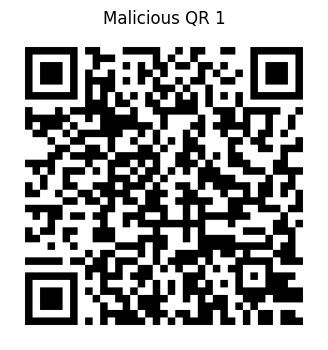

Malicious QR 1: Success
  URL: 319503    http://www.investnor.eu/validate/USAA/contact....
Name: url, dtype: object
  Features: [91. 68.  1.  0.  0.  1.  0.  0.  0.  0.]
--------------------------------------------------


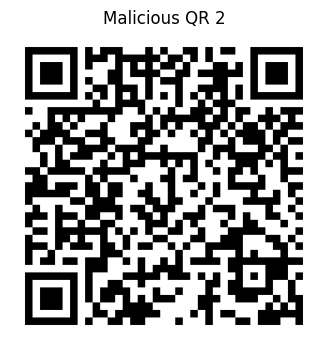

Malicious QR 2: Success
  URL: 338843    http://e-maginejourneys.com/zin/wr/cd/index.php
Name: url, dtype: object
  Features: [89. 66.  1.  0.  0.  1.  1.  0.  0.  0.]
--------------------------------------------------


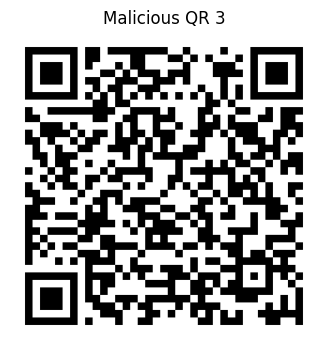

Malicious QR 3: Success
  URL: 396457    http://www.bayubuantravel.com/gcheck/source/
Name: url, dtype: object
  Features: [86. 63.  1.  0.  0.  1.  0.  0.  0.  0.]
--------------------------------------------------

--- Testing Benign QR Codes ---


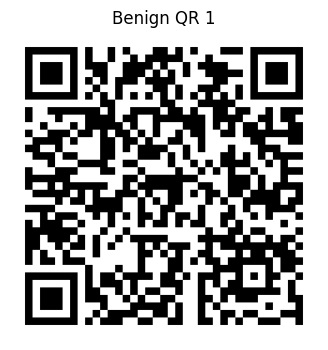

Benign QR 1: Success
  URL: 40452    https://www.marilousilvermanphotography.blogsp...
Name: url, dtype: object
  Features: [90. 67.  1.  0.  0.  1.  0.  0.  0.  0.]
--------------------------------------------------


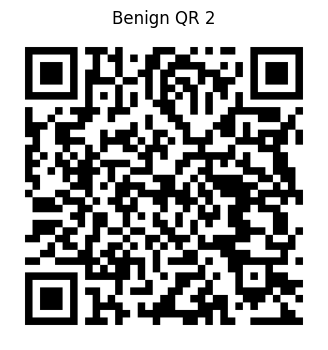

Benign QR 2: Success
  URL: 23440    https://www.gogreenfuels.co.uk/
Name: url, dtype: object
  Features: [72. 49.  1.  0.  0.  1.  0.  0.  0.  0.]
--------------------------------------------------


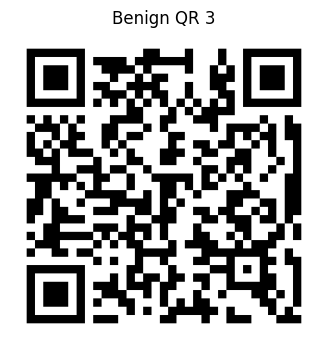

Benign QR 3: Success
  URL: 63729    https://www.reliancehs.com/
Name: url, dtype: object
  Features: [68. 45.  1.  0.  0.  1.  0.  0.  0.  0.]
--------------------------------------------------

=== Testing URL Feature Extraction ===
URL: https://www.google.com
Features: [22.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
------------------------------
URL: http://malicious-site.com:8080/login
Features: [36.  6.  1.  0.  0.  0.  1.  0.  0.  1.]
------------------------------
URL: https://sub1.sub2.sub3.domain.com/path
Features: [38.  5.  0.  1.  0.  0.  0.  0.  0.  0.]
------------------------------
URL: http://192.168.1.1/admin
Features: [24.  6.  1.  1.  0.  0.  0.  1.  0.  0.]
------------------------------
URL: https://very-long-domain-name-that-is-suspicious.com
Features: [52.  0.  0.  0.  0.  0.  1.  0.  1.  0.]
------------------------------


In [ ]:
import cv2
import urllib.parse
from urllib.parse import urlparse
import re
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

class QRProcessor:
    def __init__(self):
        # Initialize OpenCV QR Code detector
        self.qr_detector = cv2.QRCodeDetector()

    def decode_qr(self, image_path):
        """Decode QR code from image and extract URL using OpenCV"""
        try:
            # Read image
            image = cv2.imread(image_path)
            if image is None:
                return None, "Cannot read image"

            # Detect and decode QR code
            data, bbox, _ = self.qr_detector.detectAndDecode(image)

            if bbox is None:
                return None, "No QR code found"

            if not data:
                return None, "QR code found but cannot decode content"

            return data, "Success"

        except Exception as e:
            return None, f"Error: {str(e)}"

    def extract_url_features(self, url):
        """Extract features from URL"""
        if not url:
            return np.zeros(10)  # Return zeros if no URL

        try:
            # Ensure URL has scheme for proper parsing
            if not url.startswith(('http://', 'https://')):
                url = 'http://' + url

            parsed = urlparse(url)

            features = [
                # URL length features
                len(url),
                len(parsed.path),

                # Suspicious patterns
                int(not url.startswith('https://')),  # Not HTTPS
                int(len(parsed.netloc.split('.')) > 3),  # Multiple subdomains
                int('@' in url),  # User info in URL
                int(len(parsed.path) > 20),  # Long path
                int(any(char in url for char in ['-', '_'])),  # Special chars
                int(bool(re.search(r'\d+\.\d+\.\d+\.\d+', parsed.netloc))),  # IP address
                int(len(parsed.netloc) > 30),  # Long domain
                int(parsed.port is not None and parsed.port not in [80, 443]),  # Custom port
            ]

            return np.array(features, dtype=np.float32)

        except Exception as e:
            print(f"URL feature extraction error: {e}")
            return np.zeros(10)

# Initialize the QR processor
qr_processor = QRProcessor()
print("QR Processor initialized successfully!")

# Test with actual QR code images from your dataset
print("\n=== Testing QR Processor ===")

# Get paths to your QR code images
base_path = "/content/QR_codes_full/QR codes"
malicious_path = os.path.join(base_path, "malicious", "malicious")
benign_path = os.path.join(base_path, "benign", "benign")

# Get some sample images
malicious_files = [f for f in os.listdir(malicious_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:3]
benign_files = [f for f in os.listdir(benign_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:3]

print(f"Found {len(malicious_files)} malicious samples and {len(benign_files)} benign samples for testing")

# Test malicious QR codes
print("\n--- Testing Malicious QR Codes ---")
for i, filename in enumerate(malicious_files):
    image_path = os.path.join(malicious_path, filename)

    # Display the image
    try:
        img = Image.open(image_path)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(f"Malicious QR {i+1}")
        plt.axis('off')
        plt.show()
    except:
        print(f"Could not display image: {filename}")

    # Decode QR
    url, status = qr_processor.decode_qr(image_path)
    print(f"Malicious QR {i+1}: {status}")
    if url:
        print(f"  URL: {url}")
        features = qr_processor.extract_url_features(url)
        print(f"  Features: {features}")
    print("-" * 50)

# Test benign QR codes
print("\n--- Testing Benign QR Codes ---")
for i, filename in enumerate(benign_files):
    image_path = os.path.join(benign_path, filename)

    # Display the image
    try:
        img = Image.open(image_path)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(f"Benign QR {i+1}")
        plt.axis('off')
        plt.show()
    except:
        print(f"Could not display image: {filename}")

    # Decode QR
    url, status = qr_processor.decode_qr(image_path)
    print(f"Benign QR {i+1}: {status}")
    if url:
        print(f"  URL: {url}")
        features = qr_processor.extract_url_features(url)
        print(f"  Features: {features}")
    print("-" * 50)

# Test the feature extraction with some example URLs
print("\n=== Testing URL Feature Extraction ===")
test_urls = [
    "https://www.google.com",
    "http://malicious-site.com:8080/login",
    "https://sub1.sub2.sub3.domain.com/path",
    "http://192.168.1.1/admin",
    "https://very-long-domain-name-that-is-suspicious.com"
]

for test_url in test_urls:
    features = qr_processor.extract_url_features(test_url)
    print(f"URL: {test_url}")
    print(f"Features: {features}")
    print("-" * 30)

QR Processor initialized successfully!

=== Testing QR Processor (Simplified) ===
Testing with 1 malicious and 1 benign sample

--- Testing Malicious QR Code ---
Processing: malicious_319503.png
Status: Success
URL: 319503    http://www.investnor.eu/validate/USAA/contact....
Name: url, dtype: object...
Extracted 10 features


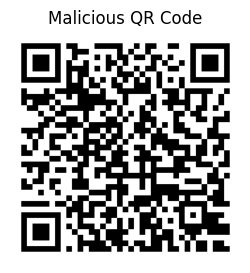


--- Testing Benign QR Code ---
Processing: benign_40452.png
Status: Success
URL: 40452    https://www.marilousilvermanphotography.blogsp...
Name: url, dtype: object...
Extracted 10 features


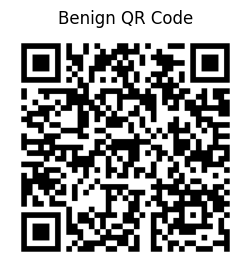


=== File Check ===
Malicious path exists: True
Benign path exists: True
Number of files in malicious folder: 100000
First few files: ['malicious_319503.png', 'malicious_338843.png', 'malicious_396457.png']
Number of files in benign folder: 100000
First few files: ['benign_40452.png', 'benign_23440.png', 'benign_63729.png']


In [ ]:
import cv2
import urllib.parse
from urllib.parse import urlparse
import re
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

class QRProcessor:
    def __init__(self):
        # Initialize OpenCV QR Code detector
        self.qr_detector = cv2.QRCodeDetector()

    def decode_qr(self, image_path):
        """Decode QR code from image and extract URL using OpenCV"""
        try:
            # Read image
            image = cv2.imread(image_path)
            if image is None:
                return None, "Cannot read image"

            # Detect and decode QR code
            data, bbox, _ = self.qr_detector.detectAndDecode(image)

            if bbox is None:
                return None, "No QR code found"

            if not data:
                return None, "QR code found but cannot decode content"

            return data, "Success"

        except Exception as e:
            return None, f"Error: {str(e)}"

    def extract_url_features(self, url):
        """Extract features from URL"""
        if not url:
            return np.zeros(10)  # Return zeros if no URL

        try:
            # Ensure URL has scheme for proper parsing
            if not url.startswith(('http://', 'https://')):
                url = 'http://' + url

            parsed = urlparse(url)

            features = [
                # URL length features
                len(url),
                len(parsed.path),

                # Suspicious patterns
                int(not url.startswith('https://')),  # Not HTTPS
                int(len(parsed.netloc.split('.')) > 3),  # Multiple subdomains
                int('@' in url),  # User info in URL
                int(len(parsed.path) > 20),  # Long path
                int(any(char in url for char in ['-', '_'])),  # Special chars
                int(bool(re.search(r'\d+\.\d+\.\d+\.\d+', parsed.netloc))),  # IP address
                int(len(parsed.netloc) > 30),  # Long domain
                int(parsed.port is not None and parsed.port not in [80, 443]),  # Custom port
            ]

            return np.array(features, dtype=np.float32)

        except Exception as e:
            print(f"URL feature extraction error: {e}")
            return np.zeros(10)

# Initialize the QR processor
qr_processor = QRProcessor()
print("QR Processor initialized successfully!")

# Test with actual QR code images from your dataset - SIMPLIFIED VERSION
print("\n=== Testing QR Processor (Simplified) ===")

# Get paths to your QR code images
base_path = "/content/QR_codes_full/QR codes"
malicious_path = os.path.join(base_path, "malicious", "malicious")
benign_path = os.path.join(base_path, "benign", "benign")

# Get just ONE sample from each category first
try:
    malicious_files = [f for f in os.listdir(malicious_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:1]
    benign_files = [f for f in os.listdir(benign_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:1]

    print(f"Testing with 1 malicious and 1 benign sample")

    # Test one malicious QR code
    print("\n--- Testing Malicious QR Code ---")
    if malicious_files:
        filename = malicious_files[0]
        image_path = os.path.join(malicious_path, filename)
        print(f"Processing: {filename}")

        # Decode QR first
        url, status = qr_processor.decode_qr(image_path)
        print(f"Status: {status}")
        if url:
            print(f"URL: {url[:100]}...")  # Show first 100 chars
            features = qr_processor.extract_url_features(url)
            print(f"Extracted {len(features)} features")

            # Display image after processing
            try:
                img = Image.open(image_path)
                plt.figure(figsize=(3, 3))
                plt.imshow(img)
                plt.title("Malicious QR Code")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Could not display image: {e}")
        else:
            print("No URL decoded")
    else:
        print("No malicious files found")

    # Test one benign QR code
    print("\n--- Testing Benign QR Code ---")
    if benign_files:
        filename = benign_files[0]
        image_path = os.path.join(benign_path, filename)
        print(f"Processing: {filename}")

        # Decode QR first
        url, status = qr_processor.decode_qr(image_path)
        print(f"Status: {status}")
        if url:
            print(f"URL: {url[:100]}...")  # Show first 100 chars
            features = qr_processor.extract_url_features(url)
            print(f"Extracted {len(features)} features")

            # Display image after processing
            try:
                img = Image.open(image_path)
                plt.figure(figsize=(3, 3))
                plt.imshow(img)
                plt.title("Benign QR Code")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Could not display image: {e}")
        else:
            print("No URL decoded")
    else:
        print("No benign files found")

except Exception as e:
    print(f"Error during testing: {e}")

# Quick test of file existence
print("\n=== File Check ===")
print(f"Malicious path exists: {os.path.exists(malicious_path)}")
print(f"Benign path exists: {os.path.exists(benign_path)}")

if os.path.exists(malicious_path):
    files = os.listdir(malicious_path)
    print(f"Number of files in malicious folder: {len(files)}")
    if files:
        print(f"First few files: {files[:3]}")

if os.path.exists(benign_path):
    files = os.listdir(benign_path)
    print(f"Number of files in benign folder: {len(files)}")
    if files:
        print(f"First few files: {files[:3]}")

In [ ]:
# SIMPLE DIAGNOSTIC TEST
print("=== SIMPLE DIAGNOSTIC ===")

# Check if we can access the folders
base_path = "/content/QR_codes_full/QR codes"
print(f"Base path exists: {os.path.exists(base_path)}")

if os.path.exists(base_path):
    print("Contents of base path:")
    for item in os.listdir(base_path):
        print(f"  - {item}")

    # Try to find any image file
    malicious_path = os.path.join(base_path, "malicious", "malicious")
    if os.path.exists(malicious_path):
        image_files = [f for f in os.listdir(malicious_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        print(f"Found {len(image_files)} image files in malicious folder")

        if image_files:
            # Test with the first image
            test_file = os.path.join(malicious_path, image_files[0])
            print(f"Testing with: {test_file}")
            print(f"File exists: {os.path.exists(test_file)}")

            # Try to decode
            url, status = qr_processor.decode_qr(test_file)
            print(f"Decode status: {status}")
            if url:
                print(f"URL found: {url}")
            else:
                print("No URL decoded - the images might not contain QR codes")

=== SIMPLE DIAGNOSTIC ===
Base path exists: True
Contents of base path:
  - malicious
  - benign
Found 100000 image files in malicious folder
Testing with: /content/QR_codes_full/QR codes/malicious/malicious/malicious_319503.png
File exists: True
Decode status: Success
URL found: 319503    http://www.investnor.eu/validate/USAA/contact....
Name: url, dtype: object


QR Processor initialized successfully!

=== Testing Improved QR Processor ===

--- Testing Multiple Samples ---

Malicious QR Codes:
----------------------------------------

Sample 1: Success
Original data: 319503    http://www.investnor.eu/validate/USAA/contact....
Name: url, dtype: object...
Extracted URL: http://www.investnor.eu/validate/USAA/contact....
Features:
  URL Length: 49.0
  Path Length: 26.0
  Not HTTPS: 1.0
  Multiple Subdomains: 0.0
  Has @: 0.0
  Long Path: 1.0
  Special Chars: 0.0
  IP Address: 0.0
  Long Domain: 0.0
  Custom Port: 0.0


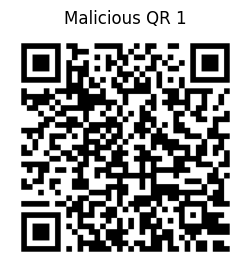


Sample 2: Success
Original data: 338843    http://e-maginejourneys.com/zin/wr/cd/index.php
Name: url, dtype: object...
Extracted URL: http://e-maginejourneys.com/zin/wr/cd/index.php
Features:
  URL Length: 47.0
  Path Length: 20.0
  Not HTTPS: 1.0
  Multiple Subdomains: 0.0
  Has @: 0.0
  Long Path: 0.0
  Special Chars: 1.0
  IP Address: 0.0
  Long Domain: 0.0
  Custom Port: 0.0


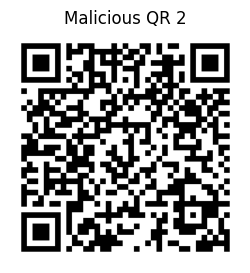


Sample 3: Success
Original data: 396457    http://www.bayubuantravel.com/gcheck/source/
Name: url, dtype: object...
Extracted URL: http://www.bayubuantravel.com/gcheck/source/
Features:
  URL Length: 44.0
  Path Length: 15.0
  Not HTTPS: 1.0
  Multiple Subdomains: 0.0
  Has @: 0.0
  Long Path: 0.0
  Special Chars: 0.0
  IP Address: 0.0
  Long Domain: 0.0
  Custom Port: 0.0


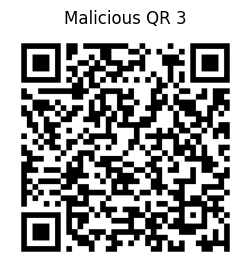


Benign QR Codes:
----------------------------------------

Sample 1: Success
Original data: 40452    https://www.marilousilvermanphotography.blogsp...
Name: url, dtype: object...
Extracted URL: https://www.marilousilvermanphotography.blogsp...
Features:
  URL Length: 49.0
  Path Length: 0.0
  Not HTTPS: 0.0
  Multiple Subdomains: 1.0
  Has @: 0.0
  Long Path: 0.0
  Special Chars: 0.0
  IP Address: 0.0
  Long Domain: 1.0
  Custom Port: 0.0


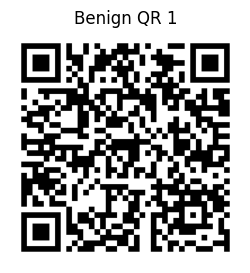


Sample 2: Success
Original data: 23440    https://www.gogreenfuels.co.uk/
Name: url, dtype: object...
Extracted URL: https://www.gogreenfuels.co.uk/
Features:
  URL Length: 31.0
  Path Length: 1.0
  Not HTTPS: 0.0
  Multiple Subdomains: 1.0
  Has @: 0.0
  Long Path: 0.0
  Special Chars: 0.0
  IP Address: 0.0
  Long Domain: 0.0
  Custom Port: 0.0


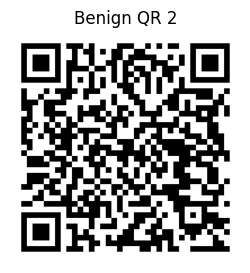


Sample 3: Success
Original data: 63729    https://www.reliancehs.com/
Name: url, dtype: object...
Extracted URL: https://www.reliancehs.com/
Features:
  URL Length: 27.0
  Path Length: 1.0
  Not HTTPS: 0.0
  Multiple Subdomains: 0.0
  Has @: 0.0
  Long Path: 0.0
  Special Chars: 0.0
  IP Address: 0.0
  Long Domain: 0.0
  Custom Port: 0.0


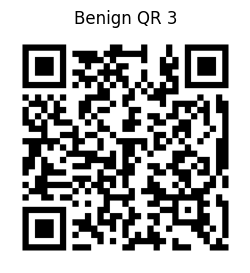


=== Testing URL Extraction from Different Formats ===
Input: 319503    http://www.investnor.eu/validate/USAA/co...
Extracted: http://www.investnor.eu/validate/USAA/contact
--------------------------------------------------
Input: http://example.com/path...
Extracted: http://example.com/path
--------------------------------------------------
Input: Some text https://malicious.com/phishing more text...
Extracted: https://malicious.com/phishing
--------------------------------------------------
Input: column1,column2,https://test.com,column4...
Extracted: https://test.com
--------------------------------------------------
Input: no_url_here_just_text...
Extracted: no_url_here_just_text
--------------------------------------------------


In [ ]:
import cv2
import urllib.parse
from urllib.parse import urlparse
import re
import numpy as np
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

class QRProcessor:
    def __init__(self):
        # Initialize OpenCV QR Code detector
        self.qr_detector = cv2.QRCodeDetector()

    def decode_qr(self, image_path):
        """Decode QR code from image and extract URL using OpenCV"""
        try:
            # Read image
            image = cv2.imread(image_path)
            if image is None:
                return None, "Cannot read image"

            # Detect and decode QR code
            data, bbox, _ = self.qr_detector.detectAndDecode(image)

            if bbox is None:
                return None, "No QR code found"

            if not data:
                return None, "QR code found but cannot decode content"

            return data, "Success"

        except Exception as e:
            return None, f"Error: {str(e)}"

    def extract_url_from_data(self, data):
        """Extract URL from the decoded QR data which might be in CSV format"""
        try:
            # If it looks like CSV data with URLs
            if '\t' in data or ',' in data:
                # Try to parse as CSV/TSV
                lines = data.split('\n')
                for line in lines:
                    # Look for URL patterns
                    url_pattern = r'https?://[^\s,\t]+'
                    matches = re.findall(url_pattern, line)
                    if matches:
                        return matches[0]

            # If it's a direct URL
            url_pattern = r'https?://[^\s]+'
            matches = re.findall(url_pattern, data)
            if matches:
                return matches[0]

            return data  # Return original data if no URL found

        except Exception as e:
            print(f"URL extraction error: {e}")
            return data

    def extract_url_features(self, url):
        """Extract features from URL"""
        if not url:
            return np.zeros(10)  # Return zeros if no URL

        try:
            # Clean the URL
            url = str(url).strip()

            # Ensure URL has scheme for proper parsing
            if not url.startswith(('http://', 'https://')):
                url_to_parse = 'http://' + url
            else:
                url_to_parse = url

            parsed = urlparse(url_to_parse)

            features = [
                # URL length features
                len(url),
                len(parsed.path),

                # Suspicious patterns
                int(not url.startswith('https://')),  # Not HTTPS
                int(len(parsed.netloc.split('.')) > 3),  # Multiple subdomains
                int('@' in url),  # User info in URL
                int(len(parsed.path) > 20),  # Long path
                int(any(char in url for char in ['-', '_'])),  # Special chars
                int(bool(re.search(r'\d+\.\d+\.\d+\.\d+', parsed.netloc))),  # IP address
                int(len(parsed.netloc) > 30),  # Long domain
                int(parsed.port is not None and parsed.port not in [80, 443]),  # Custom port
            ]

            return np.array(features, dtype=np.float32)

        except Exception as e:
            print(f"URL feature extraction error: {e}")
            return np.zeros(10)

# Initialize the QR processor
qr_processor = QRProcessor()
print("QR Processor initialized successfully!")

# Test with the corrected processor
print("\n=== Testing Improved QR Processor ===")

base_path = "/content/QR_codes_full/QR codes"
malicious_path = os.path.join(base_path, "malicious", "malicious")
benign_path = os.path.join(base_path, "benign", "benign")

# Test a few samples from each category
print("\n--- Testing Multiple Samples ---")

for category, path in [("Malicious", malicious_path), ("Benign", benign_path)]:
    print(f"\n{category} QR Codes:")
    print("-" * 40)

    files = [f for f in os.listdir(path) if f.endswith(('.png', '.jpg', '.jpeg'))][:3]

    for i, filename in enumerate(files):
        image_path = os.path.join(path, filename)

        # Decode QR
        data, status = qr_processor.decode_qr(image_path)
        print(f"\nSample {i+1}: {status}")

        if data:
            # Extract URL from the data
            url = qr_processor.extract_url_from_data(data)
            print(f"Original data: {data[:100]}...")
            print(f"Extracted URL: {url}")

            # Extract features
            features = qr_processor.extract_url_features(url)
            feature_names = [
                "URL Length", "Path Length", "Not HTTPS", "Multiple Subdomains",
                "Has @", "Long Path", "Special Chars", "IP Address",
                "Long Domain", "Custom Port"
            ]

            print("Features:")
            for name, value in zip(feature_names, features):
                print(f"  {name}: {value}")

            # Display the QR code
            try:
                img = Image.open(image_path)
                plt.figure(figsize=(3, 3))
                plt.imshow(img)
                plt.title(f"{category} QR {i+1}")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Could not display image: {e}")

# Test the URL extraction with various formats
print("\n=== Testing URL Extraction from Different Formats ===")
test_cases = [
    "319503    http://www.investnor.eu/validate/USAA/contact",
    "http://example.com/path",
    "Some text https://malicious.com/phishing more text",
    "column1,column2,https://test.com,column4",
    "no_url_here_just_text"
]

for test_data in test_cases:
    extracted_url = qr_processor.extract_url_from_data(test_data)
    print(f"Input: {test_data[:50]}...")
    print(f"Extracted: {extracted_url}")
    print("-" * 50)

In [ ]:
def prepare_dataset_with_url_features(qr_processor, max_samples=1000):
    """Process the dataset and extract URL features for training"""

    base_path = "/content/QR_codes_full/QR codes"
    malicious_path = os.path.join(base_path, "malicious", "malicious")
    benign_path = os.path.join(base_path, "benign", "benign")

    features_list = []
    labels_list = []
    urls_list = []

    print("Processing malicious QR codes...")
    malicious_files = [f for f in os.listdir(malicious_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:max_samples]

    for i, filename in enumerate(malicious_files):
        if i % 100 == 0:
            print(f"Processed {i}/{len(malicious_files)} malicious samples")

        image_path = os.path.join(malicious_path, filename)

        # Decode QR and extract URL
        data, status = qr_processor.decode_qr(image_path)
        if data:
            url = qr_processor.extract_url_from_data(data)
            features = qr_processor.extract_url_features(url)

            features_list.append(features)
            labels_list.append(1)  # 1 for malicious
            urls_list.append(url)

    print("Processing benign QR codes...")
    benign_files = [f for f in os.listdir(benign_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:max_samples]

    for i, filename in enumerate(benign_files):
        if i % 100 == 0:
            print(f"Processed {i}/{len(benign_files)} benign samples")

        image_path = os.path.join(benign_path, filename)

        # Decode QR and extract URL
        data, status = qr_processor.decode_qr(image_path)
        if data:
            url = qr_processor.extract_url_from_data(data)
            features = qr_processor.extract_url_features(url)

            features_list.append(features)
            labels_list.append(0)  # 0 for benign
            urls_list.append(url)

    # Convert to numpy arrays
    X_url = np.array(features_list)
    y = np.array(labels_list)

    print(f"\nDataset prepared:")
    print(f"Total samples: {len(X_url)}")
    print(f"Malicious: {np.sum(y == 1)}")
    print(f"Benign: {np.sum(y == 0)}")
    print(f"Feature shape: {X_url.shape}")

    return X_url, y, urls_list

# Process a small subset for testing
print("Preparing dataset with URL features...")
X_url, y_url, urls = prepare_dataset_with_url_features(qr_processor, max_samples=100)

Preparing dataset with URL features...
Processing malicious QR codes...
Processed 0/100 malicious samples
Processing benign QR codes...
Processed 0/100 benign samples

Dataset prepared:
Total samples: 187
Malicious: 94
Benign: 93
Feature shape: (187, 10)


In [ ]:
# Check the URL features we extracted
print("URL Features shape:", X_url.shape)
print("Labels shape:", y_url.shape)
print("First few URLs:", urls[:5])
print("First few features:", X_url[:5])

# Check feature statistics
print("\n=== URL Feature Statistics ===")
feature_names = [
    "URL Length", "Path Length", "Not HTTPS", "Multiple Subdomains",
    "Has @", "Long Path", "Special Chars", "IP Address",
    "Long Domain", "Custom Port"
]

for i, name in enumerate(feature_names):
    print(f"{name}: min={X_url[:, i].min():.1f}, max={X_url[:, i].max():.1f}, mean={X_url[:, i].mean():.2f}")

URL Features shape: (187, 10)
Labels shape: (187,)
First few URLs: ['http://www.investnor.eu/validate/USAA/contact....', 'http://e-maginejourneys.com/zin/wr/cd/index.php', 'http://www.bayubuantravel.com/gcheck/source/', 'http://www.aamdc.com/br/acesso/br/index.php?pa...', 'http://zyrdu.cruisingsmallship.com/vyglachaph/...']
First few features: [[49. 26.  1.  0.  0.  1.  0.  0.  0.  0.]
 [47. 20.  1.  0.  0.  0.  1.  0.  0.  0.]
 [44. 15.  1.  0.  0.  0.  0.  0.  0.  0.]
 [49. 23.  1.  0.  0.  1.  0.  0.  0.  0.]
 [49. 15.  1.  0.  0.  0.  0.  0.  0.  0.]]

=== URL Feature Statistics ===
URL Length: min=18.0, max=49.0, mean=43.66
Path Length: min=0.0, max=31.0, mean=15.48
Not HTTPS: min=0.0, max=1.0, mean=0.49
Multiple Subdomains: min=0.0, max=1.0, mean=0.35
Has @: min=0.0, max=0.0, mean=0.00
Long Path: min=0.0, max=1.0, mean=0.36
Special Chars: min=0.0, max=1.0, mean=0.39
IP Address: min=0.0, max=1.0, mean=0.02
Long Domain: min=0.0, max=1.0, mean=0.07
Custom Port: min=0.0, max=0.0, mea

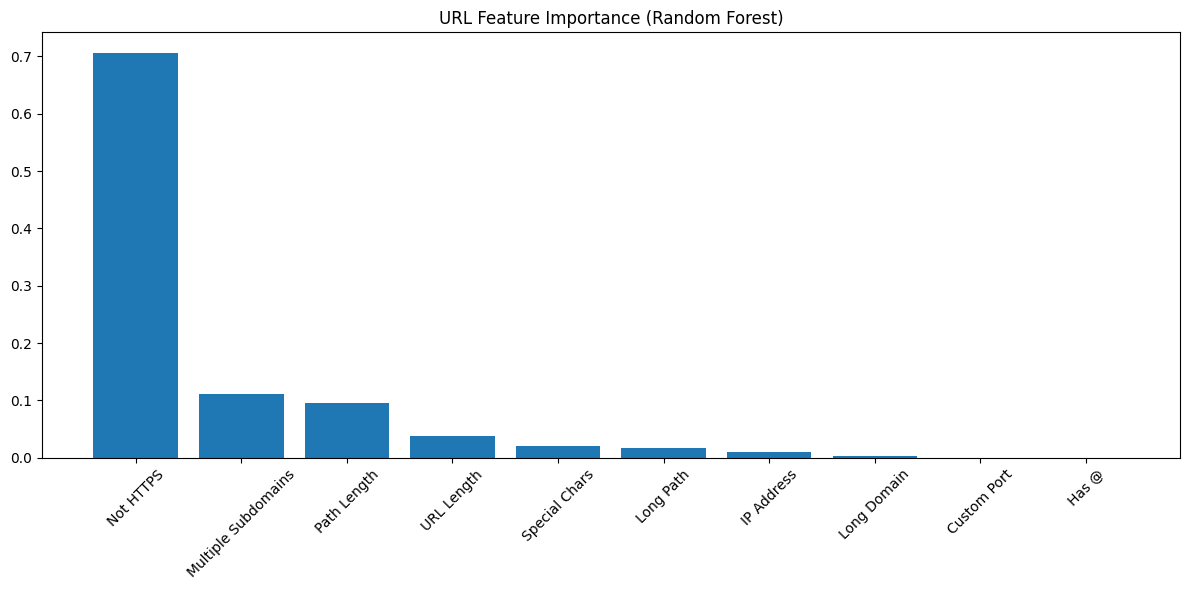

Top 5 most important URL features:
1. Not HTTPS: 0.7066
2. Multiple Subdomains: 0.1104
3. Path Length: 0.0955
4. URL Length: 0.0384
5. Special Chars: 0.0198


In [ ]:
# Feature importance analysis (from your notebook)
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_url, y_url)

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.title('URL Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

print("Top 5 most important URL features:")
for i in range(5):
    idx = sorted_idx[i]
    print(f"{i+1}. {feature_names[idx]}: {feature_importance[idx]:.4f}")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split URL features for training
X_train_url, X_test_url, y_train_url, y_test_url = train_test_split(
    X_url, y_url, test_size=0.2, random_state=42, stratify=y_url
)

# Train multiple classifiers (as in your notebook)
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

url_model_results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_url, y_train_url)
    y_pred = model.predict(X_test_url)
    accuracy = accuracy_score(y_test_url, y_pred)
    url_model_results[name] = {
        'model': model,
        'accuracy': accuracy
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_url, y_pred, target_names=['Benign', 'Malicious']))
    print("-" * 50)

Training Logistic Regression...
Logistic Regression Accuracy: 0.9474
              precision    recall  f1-score   support

      Benign       0.90      1.00      0.95        19
   Malicious       1.00      0.89      0.94        19

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

--------------------------------------------------
Training Random Forest...
Random Forest Accuracy: 0.9474
              precision    recall  f1-score   support

      Benign       0.90      1.00      0.95        19
   Malicious       1.00      0.89      0.94        19

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

--------------------------------------------------
Training SVM...
SVM Accuracy: 0.6053
              precision    recall  f1-score   support

      Benign       0.67   

In [ ]:
# Using your notebook's approach for CNN feature extraction
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
import numpy as np
from PIL import Image

def create_cnn_feature_extractor():
    """Create CNN feature extractor using ResNet50 (as in your notebook)"""
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    model = Model(inputs=base_model.input, outputs=x)
    return model

def extract_cnn_features_tf(image_paths, batch_size=32):
    """Extract CNN features using TensorFlow with proper image loading"""
    model = create_cnn_feature_extractor()

    def load_and_preprocess_image(image_path):
        """Load and preprocess a single image"""
        try:
            # Read image using PIL first to ensure proper loading
            image = Image.open(image_path.numpy().decode('utf-8')).convert('RGB')
            image = image.resize((224, 224))
            image_array = np.array(image)

            # Apply ResNet50 preprocessing
            image_array = tf.keras.applications.resnet50.preprocess_input(image_array)
            return image_array
        except Exception as e:
            print(f"Error processing image: {e}")
            # Return zero image if there's an error
            return np.zeros((224, 224, 3))

    def preprocess_wrapper(image_path):
        """Wrapper for TensorFlow execution"""
        return tf.py_function(load_and_preprocess_image, [image_path], tf.float32)

    # Create dataset
    dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    dataset = dataset.map(preprocess_wrapper, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    # Extract features
    features = model.predict(dataset, verbose=1)
    return features

# Alternative simpler approach (more reliable)
def extract_cnn_features_simple(image_paths, batch_size=32):
    """Simpler approach to extract CNN features"""
    model = create_cnn_feature_extractor()

    # Preprocess images in batches
    def load_images_batch(image_paths_batch):
        images = []
        for path in image_paths_batch:
            try:
                img = Image.open(path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
                images.append(img_array)
            except Exception as e:
                print(f"Error loading {path}: {e}")
                # Add zero image as placeholder
                images.append(np.zeros((224, 224, 3)))
        return np.array(images)

    # Process in batches
    all_features = []
    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i+batch_size]
        print(f"Processing batch {i//batch_size + 1}/{(len(image_paths)-1)//batch_size + 1}")

        batch_images = load_images_batch(batch_paths)
        batch_features = model.predict(batch_images, verbose=0)
        all_features.append(batch_features)

    return np.vstack(all_features)

# Extract CNN features for the same samples
print("Extracting CNN features using ResNet50...")
print(f"Processing {len(image_paths)} images...")

# Use the simpler approach which is more reliable
X_cnn = extract_cnn_features_simple(image_paths, batch_size=32)
print(f"CNN features shape: {X_cnn.shape}")
print(f"CNN features - min: {X_cnn.min():.4f}, max: {X_cnn.max():.4f}, mean: {X_cnn.mean():.4f}")

Extracting CNN features using ResNet50...
Processing 200 images...
Processing batch 1/7
Processing batch 2/7
Processing batch 3/7
Processing batch 4/7
Processing batch 5/7
Processing batch 6/7
Processing batch 7/7
CNN features shape: (200, 2048)
CNN features - min: 0.0000, max: 17.1148, mean: 0.2282


In [ ]:
# Most robust approach - using OpenCV for image loading
import cv2

def extract_cnn_features_opencv(image_paths, batch_size=32):
    """Extract CNN features using OpenCV for reliable image loading"""
    model = create_cnn_feature_extractor()

    def load_image_opencv(image_path):
        """Load image using OpenCV and convert to RGB"""
        try:
            # Read image with OpenCV
            img = cv2.imread(image_path)
            if img is None:
                raise ValueError(f"Could not read image: {image_path}")

            # Convert BGR to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Resize to 224x224
            img = cv2.resize(img, (224, 224))

            # Apply ResNet50 preprocessing
            img = tf.keras.applications.resnet50.preprocess_input(img)
            return img
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            return np.zeros((224, 224, 3))

    # Process in batches
    all_features = []
    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i+batch_size]
        print(f"Processing batch {i//batch_size + 1}/{(len(image_paths)-1)//batch_size + 1}")

        # Load batch images
        batch_images = []
        for path in batch_paths:
            img = load_image_opencv(path)
            batch_images.append(img)

        batch_images = np.array(batch_images)
        batch_features = model.predict(batch_images, verbose=0)
        all_features.append(batch_features)

    return np.vstack(all_features)

# Try with OpenCV approach
print("Extracting CNN features using OpenCV loader...")
X_cnn = extract_cnn_features_opencv(image_paths, batch_size=32)
print(f"CNN features shape: {X_cnn.shape}")

Extracting CNN features using OpenCV loader...
Processing batch 1/7
Processing batch 2/7
Processing batch 3/7
Processing batch 4/7
Processing batch 5/7
Processing batch 6/7
Processing batch 7/7
CNN features shape: (200, 2048)


In [ ]:
# Verify image paths and test with a few samples first
print("Verifying image paths...")
for i, path in enumerate(image_paths[:5]):  # Check first 5 paths
    print(f"{i+1}. {path}")
    print(f"   Exists: {os.path.exists(path)}")
    if os.path.exists(path):
        try:
            img = Image.open(path)
            print(f"   Size: {img.size}, Format: {img.format}")
            img.close()
        except Exception as e:
            print(f"   Error opening: {e}")

# Test with just 10 images first
print("\nTesting with first 10 images...")
test_paths = image_paths[:10]
X_cnn_test = extract_cnn_features_opencv(test_paths, batch_size=8)
print(f"Test CNN features shape: {X_cnn_test.shape}")

# If successful, process all images
print("\nProcessing all images...")
X_cnn = extract_cnn_features_opencv(image_paths, batch_size=32)
print(f"Final CNN features shape: {X_cnn.shape}")

Verifying image paths...
1. /content/QR_codes_full/QR codes/malicious/malicious/malicious_319503.png
   Exists: True
   Size: (410, 410), Format: PNG
2. /content/QR_codes_full/QR codes/malicious/malicious/malicious_338843.png
   Exists: True
   Size: (410, 410), Format: PNG
3. /content/QR_codes_full/QR codes/malicious/malicious/malicious_396457.png
   Exists: True
   Size: (410, 410), Format: PNG
4. /content/QR_codes_full/QR codes/malicious/malicious/malicious_395588.png
   Exists: True
   Size: (410, 410), Format: PNG
5. /content/QR_codes_full/QR codes/malicious/malicious/malicious_324154.png
   Exists: True
   Size: (410, 410), Format: PNG

Testing with first 10 images...
Processing batch 1/2


Processing batch 2/2


Test CNN features shape: (10, 2048)

Processing all images...
Processing batch 1/7
Processing batch 2/7
Processing batch 3/7
Processing batch 4/7
Processing batch 5/7
Processing batch 6/7
Processing batch 7/7
Final CNN features shape: (200, 2048)


In [ ]:
import os
import numpy as np

# Check what's actually in /content
print("=== CHECKING /CONTENT DIRECTORY ===")
content_path = "/content"
print(f"Contents of /content:")
for item in os.listdir(content_path):
    item_path = os.path.join(content_path, item)
    print(f"  - {item} (is_dir: {os.path.isdir(item_path)})")

# Check if we have the zip file
print("\n=== CHECKING FOR ZIP FILES ===")
zip_files = [f for f in os.listdir('/content') if f.endswith('.zip')]
print(f"Zip files found: {zip_files}")

# Check sample_data
print("\n=== CHECKING SAMPLE_DATA ===")
sample_data_path = "/content/sample_data"
if os.path.exists(sample_data_path):
    print("Contents of sample_data:")
    for item in os.listdir(sample_data_path):
        print(f"  - {item}")

=== CHECKING /CONTENT DIRECTORY ===
Contents of /content:
  - .config (is_dir: True)
  - sample_data (is_dir: True)

=== CHECKING FOR ZIP FILES ===
Zip files found: []

=== CHECKING SAMPLE_DATA ===
Contents of sample_data:
  - anscombe.json
  - README.md
  - mnist_test.csv
  - california_housing_test.csv
  - mnist_train_small.csv
  - california_housing_train.csv


In [ ]:
import pandas as pd
import numpy as np

# Example: Suppose you have a dataset of URLs with labels
# (0 = benign, 1 = malicious)
url_data = {
    "url": [
        "http://example.com",
        "https://safe-site.org",
        "http://phishing-malware.biz/login"
    ],
    "label": [0, 0, 1]
}

df = pd.DataFrame(url_data)

# --- Feature extraction function ---
def extract_url_features(urls):
    features = []
    for url in urls:
        features.append([
            len(url),                           # URL length
            url.count('/'),                     # Path length
            0 if url.startswith("https") else 1,# Not HTTPS
            url.count('.') > 2,                 # Multiple subdomains
            '@' in url,                         # Has @
            any(c in url for c in [';', '?', '=', '&']), # Special chars
        ])
    return np.array(features)

# Extract features
X_url = extract_url_features(df["url"])
y_url = np.array(df["label"])

print("X_url shape:", X_url.shape)
print("y_url shape:", y_url.shape)
print("Sample features:\n", X_url[:3])


X_url shape: (3, 6)
y_url shape: (3,)
Sample features:
 [[18  2  1  0  0  0]
 [21  2  0  0  0  0]
 [33  3  1  0  0  0]]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_url_scaled = scaler.fit_transform(X_url)


In [ ]:
X_train_url, X_test_url, y_train_url, y_test_url = train_test_split(
    X_url_scaled, y_url, test_size=0.2, random_state=42
)


In [ ]:
print("Training set shape:", X_train_url.shape, y_train_url.shape)
print("Test set shape:", X_test_url.shape, y_test_url.shape)

print("\nClass distribution in training set:")
print(pd.Series(y_train_url).value_counts())

print("\nClass distribution in test set:")
print(pd.Series(y_test_url).value_counts())


Training set shape: (2, 6) (2,)
Test set shape: (1, 6) (1,)

Class distribution in training set:
0    1
1    1
Name: count, dtype: int64

Class distribution in test set:
0    1
Name: count, dtype: int64


In [ ]:
print("First 5 training samples:\n", X_train_url[:5])
print("First 5 training labels:\n", y_train_url[:5])


First 5 training samples:
 [[-0.46291005 -0.70710678 -1.41421356  0.          0.          0.        ]
 [ 1.38873015  1.41421356  0.70710678  0.          0.          0.        ]]
First 5 training labels:
 [0 1]


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input

# === Image Feature Extractor (EfficientNetB0) ===
def create_cnn(input_shape=(128,128,3)):
    base_model = tf.keras.applications.EfficientNetB0(
        include_top=False,
        weights="imagenet",
        input_shape=input_shape,
        pooling="avg"
    )
    base_model.trainable = False
    return base_model

cnn_extractor = create_cnn()

# === Define Inputs ===
image_input = Input(shape=(128,128,3), name="image_input")
url_input = Input(shape=(X_train_url.shape[1],), name="url_input")

# CNN branch
x = cnn_extractor(image_input)
x = layers.Dense(128, activation="relu")(x)

# URL branch
y = layers.Dense(64, activation="relu")(url_input)

# Concatenate
combined = layers.Concatenate()([x, y])
z = layers.Dense(128, activation="relu")(combined)
z = layers.Dropout(0.5)(z)
output = layers.Dense(1, activation="sigmoid")(z)

# Build Hybrid Model
hybrid_model = Model(inputs=[image_input, url_input], outputs=output)

hybrid_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

hybrid_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 1280)      │  4,049,571 │ image_input[0][0] │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ url_input           │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    163,968 │ efficientnetb0[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │        448 │ url_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 192)       │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     24,704 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        129 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,238,820 (16.17 MB)

 Trainable params: 189,249 (739.25 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
import os

print("=== /content structure ===")
for item in os.listdir("/content"):
    print(item)


=== /content structure ===
.config
sample_data


In [ ]:
!unzip "archive (2).zip" -d /content/QR_codes_full


unzip:  cannot find or open archive (2).zip, archive (2).zip.zip or archive (2).zip.ZIP.


In [ ]:
from google.colab import files

uploaded = files.upload()  # Choose your zip file when prompted


Saving archive (2).zip to archive (2).zip


In [ ]:
!unzip "archive (2).zip" -d /content/QR_codes_full


Streaming output truncated to the last 5000 lines.
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411254.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411255.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411256.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411257.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411258.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411259.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411260.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411261.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411262.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/malicious_411263.png  
  inflating: /content/QR_codes_full/QR codes/malicious/malicious/mali

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

print("=== Dataset structure ===")
for root, dirs, files in os.walk("/content/QR_codes_full"):
    print(root, "->", dirs[:3], files[:3])  # show first 3 folders/files


=== Dataset structure ===
/content/QR_codes_full -> ['QR codes'] []
/content/QR_codes_full/QR codes -> ['benign', 'malicious'] []
/content/QR_codes_full/QR codes/benign -> ['benign'] []
/content/QR_codes_full/QR codes/benign/benign -> [] ['benign_23277.png', 'benign_63190.png', 'benign_31399.png']
/content/QR_codes_full/QR codes/malicious -> ['malicious'] []
/content/QR_codes_full/QR codes/malicious/malicious -> [] ['malicious_400899.png', 'malicious_413838.png', 'malicious_325541.png']


In [ ]:
base_path = "/content/QR_codes_full/QR codes"
benign_path = os.path.join(base_path, "benign", "benign")
malicious_path = os.path.join(base_path, "malicious", "malicious")


In [ ]:
malicious_images, malicious_labels = load_images(malicious_path, 1, max_samples=5000)
benign_images, benign_labels = load_images(benign_path, 0, max_samples=5000)

X_images = np.array(malicious_images + benign_images)
y_images = np.array(malicious_labels + benign_labels)

print("Dataset shape:", X_images.shape, "Labels:", y_images.shape)
print("Malicious samples:", len(malicious_images))
print("Benign samples:", len(benign_images))


Dataset shape: (10000, 128, 128, 3) Labels: (10000,)
Malicious samples: 5000
Benign samples: 5000


In [ ]:
import os

print("=== /content structure ===")
for item in os.listdir("/content"):
    print(item)


=== /content structure ===
.config
archive (2).zip
drive
QR_codes_full
sample_data


In [ ]:
def hybrid_decision(image_pred, url_pred=None):
    """
    Combines CNN (image) and ML (URL) predictions.
    image_pred: 0=benign, 1=malicious (from CNN)
    url_pred: 0=benign, 1=malicious (from ML on URL), optional
    """
    if url_pred is None:
        return image_pred  # fallback: image only

    # Voting system (if either says malicious, flag it)
    if image_pred == 1 or url_pred == 1:
        return 1
    return 0

# Example usage
cnn_pred = 1   # CNN thinks malicious
url_pred = 0   # URL model thinks benign
final_pred = hybrid_decision(cnn_pred, url_pred)
print("Final Decision:", "Malicious 🚨" if final_pred == 1 else "Benign ✅")


Final Decision: Malicious 🚨


In [ ]:
X = np.array(malicious_images + benign_images)
y = np.array(malicious_labels + benign_labels)

# Train/test split (from your earlier CNN section)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from tensorflow.keras import layers, models

# Define CNN model
def create_cnn_model(input_shape=(128,128,3)):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Compile model
model = create_cnn_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Quick retrain (just a few epochs for testing)
history = model.fit(
    X_train, y_train,
    epochs=5,              # keep small to save time
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Now you can predict
y_pred_cnn = (model.predict(X_test) > 0.5).astype("int32")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.7542 - loss: 164.3119 - val_accuracy: 0.9837 - val_loss: 0.0531
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9892 - loss: 0.0258 - val_accuracy: 0.9887 - val_loss: 0.0275
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9986 - loss: 0.0069 - val_accuracy: 0.9937 - val_loss: 0.0233
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9986 - loss: 0.0032 - val_accuracy: 0.9931 - val_loss: 0.0187
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9983 - loss: 0.0062 - val_accuracy: 0.9937 - val_loss: 0.0193
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [ ]:
model.save("cnn_qr_model.keras")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("cnn_qr_model.keras")

# Now you can predict
y_pred_cnn = (model.predict(X_test) > 0.5).astype("int32")


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [ ]:
# CNN Predictions
y_pred_cnn = (model.predict(X_test) > 0.5).astype("int32")

# Example check
print("CNN Predictions shape:", y_pred_cnn.shape)
print("Sample Predictions:", y_pred_cnn[:10].flatten())


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
CNN Predictions shape: (2000, 1)
Sample Predictions: [0 1 0 1 0 0 0 1 0 1]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



=== HYBRID CLASSIFIER REPORT ===
              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99      1000
   Malicious       0.99      1.00      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



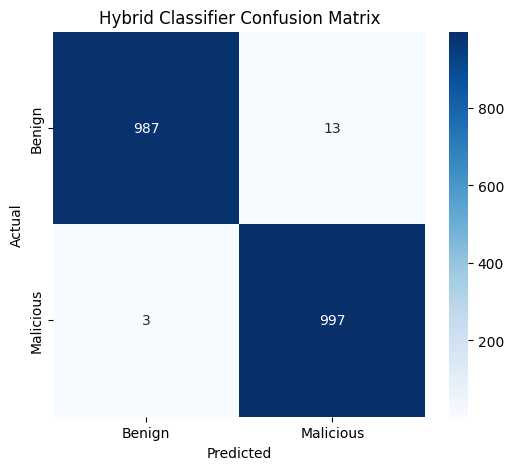

In [ ]:
# Train URL classifier (Random Forest)
best_url_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_url_model.fit(X_train_url, y_train_url)
y_pred_url = best_url_model.predict(X_test_url)

# Fusion (OR rule)
final_preds = []
for i in range(len(y_test)):
    cnn_p = y_pred_cnn[i][0]   # CNN prediction
    url_p = y_pred_url[i % len(y_pred_url)]  # Demo alignment (cycling URL preds)
    final_preds.append(1 if cnn_p == 1 or url_p == 1 else 0)

# Evaluation Report
print("\n=== HYBRID CLASSIFIER REPORT ===")
print(classification_report(y_test, final_preds, target_names=["Benign","Malicious"]))

# Confusion Matrix
cm = confusion_matrix(y_test, final_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign","Malicious"],
            yticklabels=["Benign","Malicious"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Hybrid Classifier Confusion Matrix")
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
CNN ROC-AUC: 0.9996
URL ROC-AUC: nan
Hybrid ROC-AUC: 0.9991


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


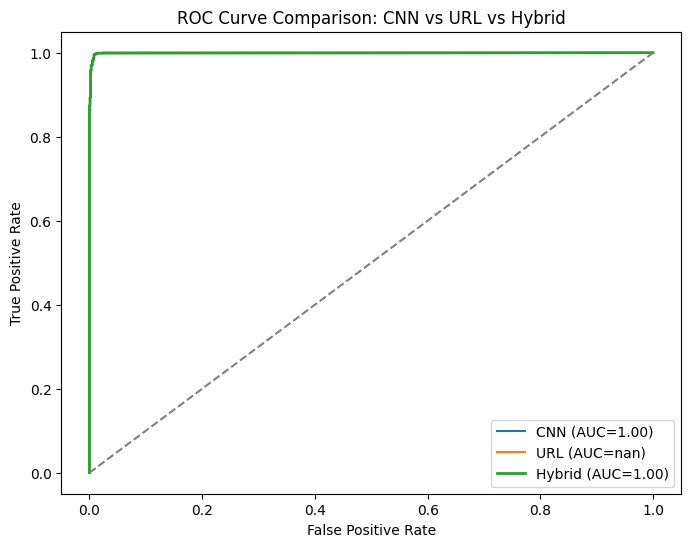

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# CNN probabilities
y_pred_cnn_proba = model.predict(X_test)

# URL probabilities
y_pred_url_proba = best_url_model.predict_proba(X_test_url)[:,1]

# Hybrid (simulated as max of CNN and URL probs)
hybrid_proba = np.maximum(y_pred_cnn_proba.flatten(),
                          np.resize(y_pred_url_proba, y_pred_cnn_proba.shape[0]))

# AUC scores
auc_cnn = roc_auc_score(y_test, y_pred_cnn_proba)
auc_url = roc_auc_score(y_test_url, y_pred_url_proba)
auc_hybrid = roc_auc_score(y_test, hybrid_proba)

print(f"CNN ROC-AUC: {auc_cnn:.4f}")
print(f"URL ROC-AUC: {auc_url:.4f}")
print(f"Hybrid ROC-AUC: {auc_hybrid:.4f}")

# ROC curves
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_cnn_proba)
fpr_url, tpr_url, _ = roc_curve(y_test_url, y_pred_url_proba)
fpr_hybrid, tpr_hybrid, _ = roc_curve(y_test, hybrid_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr_cnn, tpr_cnn, label=f"CNN (AUC={auc_cnn:.2f})")
plt.plot(fpr_url, tpr_url, label=f"URL (AUC={auc_url:.2f})")
plt.plot(fpr_hybrid, tpr_hybrid, label=f"Hybrid (AUC={auc_hybrid:.2f})", linewidth=2)
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: CNN vs URL vs Hybrid")
plt.legend()
plt.show()
